<a href="https://colab.research.google.com/github/shiri9/non-iid/blob/main/final_results_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(metrics))

# Means and stds for complex and simple architectures
data = {
    "CL": {
        "Complex": ([0.92, 0.93, 0.68, 0.73], [0.00, 0.01, 0.01, 0.02]),
        "Simple": ([0.92, 0.95, 0.67, 0.72], [0.00, 0.00, 0.01, 0.00])
    },
    "FL-IID": {
        "Complex": ([0.91, 0.71, 0.57, 0.59], [0.00, 0.01, 0.01, 0.01]),
        "Simple": ([0.91, 0.71, 0.57, 0.57], [0.00, 0.01, 0.01, 0.01])
    },
    "FL-Data": {
        "Complex": ([0.91, 0.82, 0.65, 0.68], [0.00, 0.01, 0.00, 0.00]),
        "Simple": ([0.92, 0.83, 0.65, 0.68], [0.00, 0.01, 0.00, 0.00])
    },
    "FL-Label": {
        "Complex": ([0.85, 0.64, 0.48, 0.50], [0.04, 0.08, 0.04, 0.04]),
        "Simple": ([0.76, 0.52, 0.45, 0.43], [0.20, 0.19, 0.20, 0.23])
    }
}

# Significance indicators
sig_levels = {
    "Complex": [['*', '***', '**', '**'], ['*', '***', '*', '*'], ['**', '***', '***', '***']],
    "Simple": [['*', '***', '***', '***'], ['', '***', '*', '**'], ['*', '***', '*', '**']]
}

labels = ['CL', 'FL-IID', 'FL-Data', 'FL-Label']
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
bar_width = 0.18
offsets = [-1.5, -0.5, 0.5, 1.5]

# Common settings
plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 13})

# Plotting function
def plot_architecture(ax, arch, title):
    for i, label in enumerate(labels):
        means, stds = data[label][arch]
        ax.bar(x + offsets[i]*bar_width, means, yerr=stds, width=bar_width,
               label=label, capsize=4, color=colors[i])
    for j in range(len(metrics)):
        for i in range(1, 4):  # Only FL comparisons
            ptext = sig_levels[arch][i-1][j]
            if ptext:
                ax.text(x[j] + offsets[i]*bar_width, data[labels[i]][arch][0][j] + 0.015,
                        ptext, ha='center', va='bottom', fontsize=13, color='black')
    ax.set_title(title, fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylabel("Score")
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend(title='Scenario', loc='upper right', fontsize=11)

# Plot both architectures
plot_architecture(ax1, "Complex", "Complex Architecture")
plot_architecture(ax2, "Simple", "Simple Architecture")

# Statistical significance legend below
fig.text(0.5, -0.12,
         '*: p < 0.05     **: p < 0.01     ***: p < 0.001\nStars indicate statistical significance of FL variant compared to CL for each metric.',
         ha='center', va='bottom', fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('architecture_comparison-ffff.eps', format='eps', bbox_inches='tight')
plt.savefig('architecture_comparison-ffff.tif', dpi=600, bbox_inches='tight')
plt.close()
plt.show()


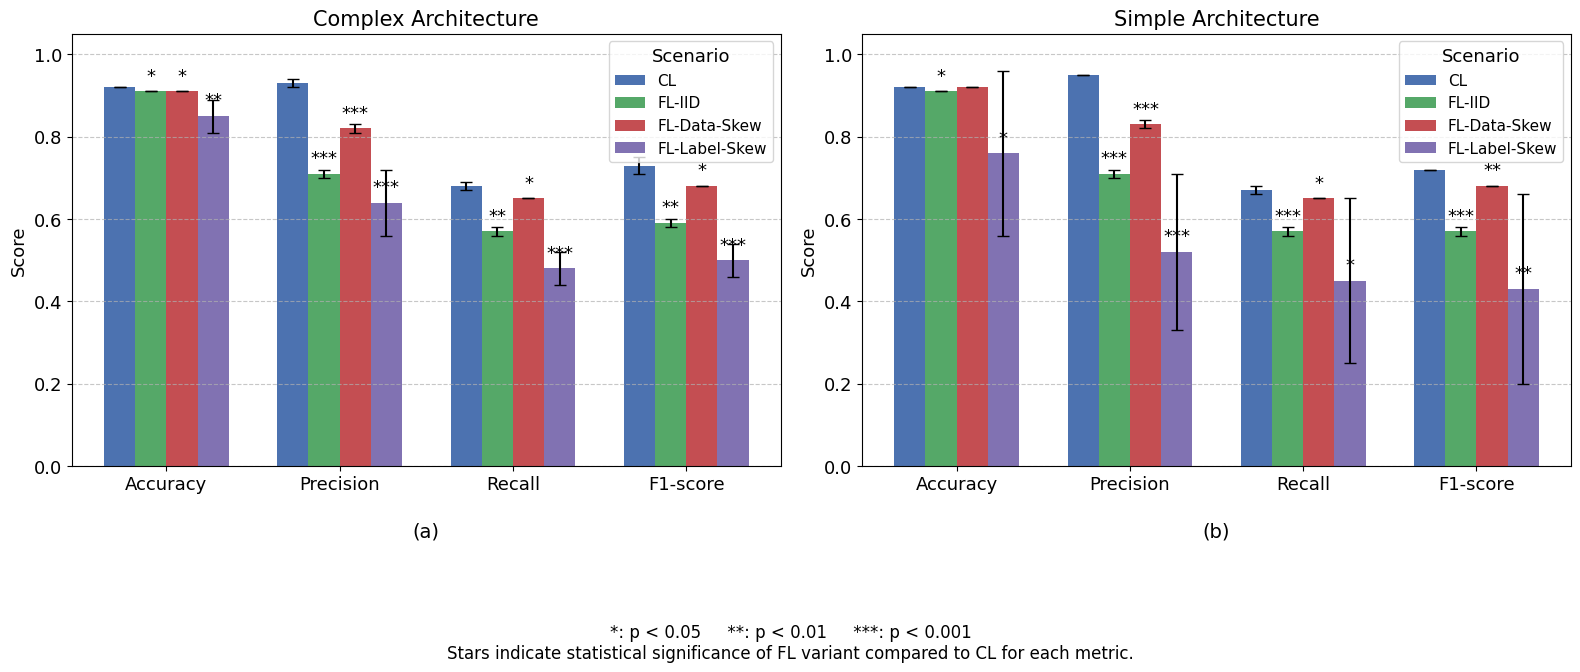

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
x = np.arange(len(metrics))

# Means and stds for complex and simple architectures
data = {
    "CL": {
        "Complex": ([0.92, 0.93, 0.68, 0.73], [0.00, 0.01, 0.01, 0.02]),
        "Simple": ([0.92, 0.95, 0.67, 0.72], [0.00, 0.00, 0.01, 0.00])
    },
    "FL-IID": {
        "Complex": ([0.91, 0.71, 0.57, 0.59], [0.00, 0.01, 0.01, 0.01]),
        "Simple": ([0.91, 0.71, 0.57, 0.57], [0.00, 0.01, 0.01, 0.01])
    },
    "FL-Data-Skew": {
        "Complex": ([0.91, 0.82, 0.65, 0.68], [0.00, 0.01, 0.00, 0.00]),
        "Simple": ([0.92, 0.83, 0.65, 0.68], [0.00, 0.01, 0.00, 0.00])
    },
    "FL-Label-Skew": {
        "Complex": ([0.85, 0.64, 0.48, 0.50], [0.04, 0.08, 0.04, 0.04]),
        "Simple": ([0.76, 0.52, 0.45, 0.43], [0.20, 0.19, 0.20, 0.23])
    }
}

# Significance indicators
sig_levels = {
    "Complex": [['*', '***', '**', '**'], ['*', '***', '*', '*'], ['**', '***', '***', '***']],
    "Simple": [['*', '***', '***', '***'], ['', '***', '*', '**'], ['*', '***', '*', '**']]
}

labels = ['CL', 'FL-IID', 'FL-Data-Skew', 'FL-Label-Skew']
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2']

# Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
bar_width = 0.18
offsets = [-1.5, -0.5, 0.5, 1.5]

# Common settings
plt.rcParams.update({'font.family': 'DejaVu Sans', 'font.size': 13})

# Plotting function
def plot_architecture(ax, arch, title):
    for i, label in enumerate(labels):
        means, stds = data[label][arch]
        ax.bar(x + offsets[i]*bar_width, means, yerr=stds, width=bar_width,
               label=label, capsize=4, color=colors[i])
    for j in range(len(metrics)):
        for i in range(1, 4):  # Only FL comparisons
            ptext = sig_levels[arch][i-1][j]
            if ptext:
                ax.text(x[j] + offsets[i]*bar_width, data[labels[i]][arch][0][j] + 0.015,
                        ptext, ha='center', va='bottom', fontsize=13, color='black')
    ax.set_title(title, fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylabel("Score")
    ax.set_ylim(0, 1.05)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    ax.legend(title='Scenario', loc='upper right', fontsize=11)

# Plot both architectures with original titles
plot_architecture(ax1, "Complex", "Complex Architecture")
plot_architecture(ax2, "Simple", "Simple Architecture")

# --- Modified Part: Add (a) and (b) using set_xlabel for better centering ---
ax1.set_xlabel("(a)", labelpad=20, fontsize=14) # Adjust labelpad as needed for vertical position
ax2.set_xlabel("(b)", labelpad=20, fontsize=14) # Adjust labelpad as needed for vertical position
# --- End of Modified Part ---

# Statistical significance legend below
fig.text(0.5, -0.12,
         '*: p < 0.05     **: p < 0.01     ***: p < 0.001\nStars indicate statistical significance of FL variant compared to CL for each metric.',
         ha='center', va='bottom', fontsize=12)

plt.tight_layout(rect=[0, 0.05, 1, 1])

# Save figures in multiple formats
plt.savefig('architecture_comparison.eps', format='eps', bbox_inches='tight')  # Vector format
plt.savefig('architecture_comparison.tif', dpi=600, bbox_inches='tight')      # High-res raster
plt.savefig('architecture_comparison.png', dpi=300, bbox_inches='tight')     # Standard raster

plt.show()

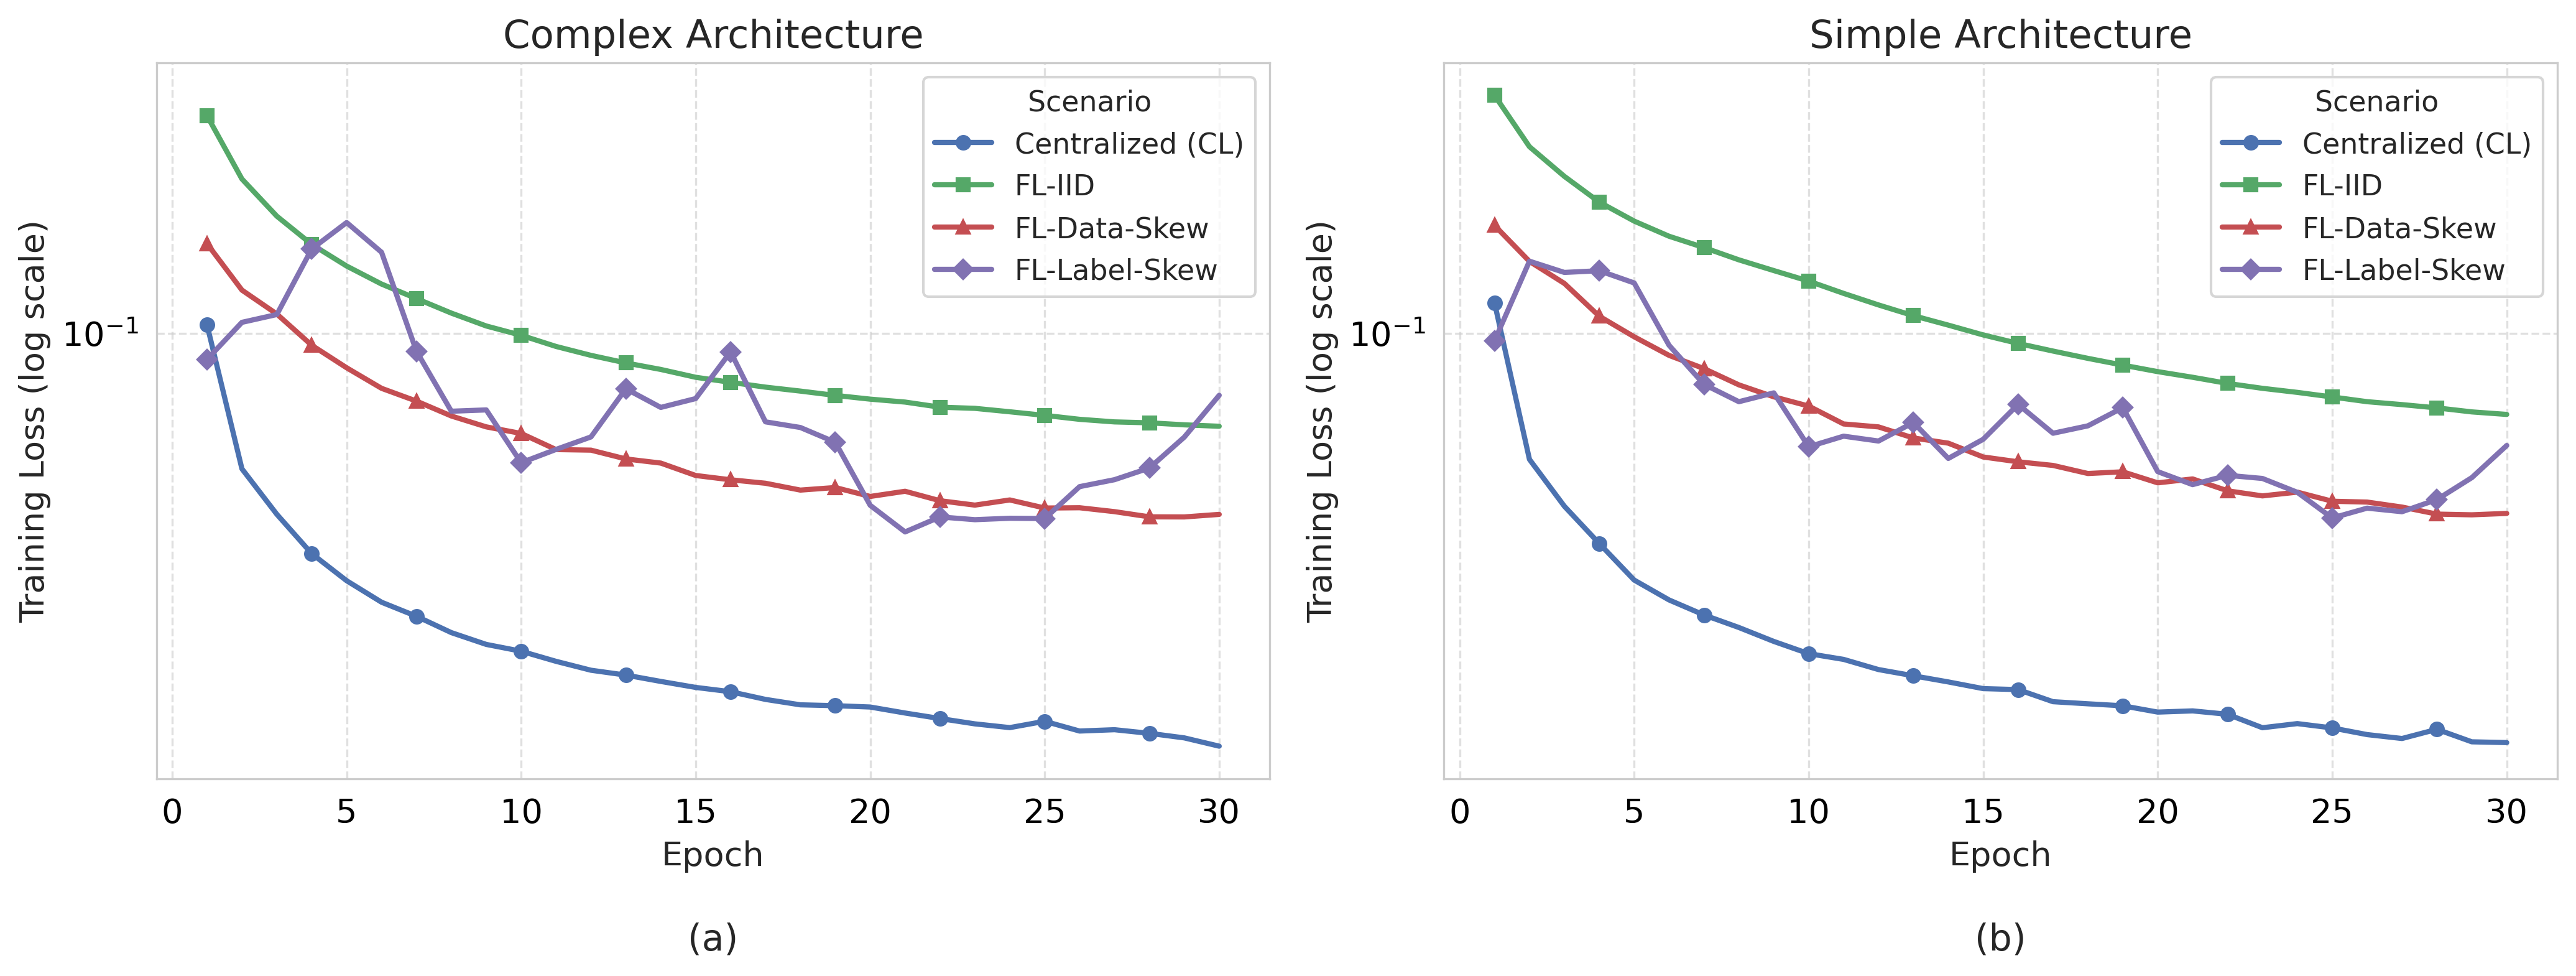

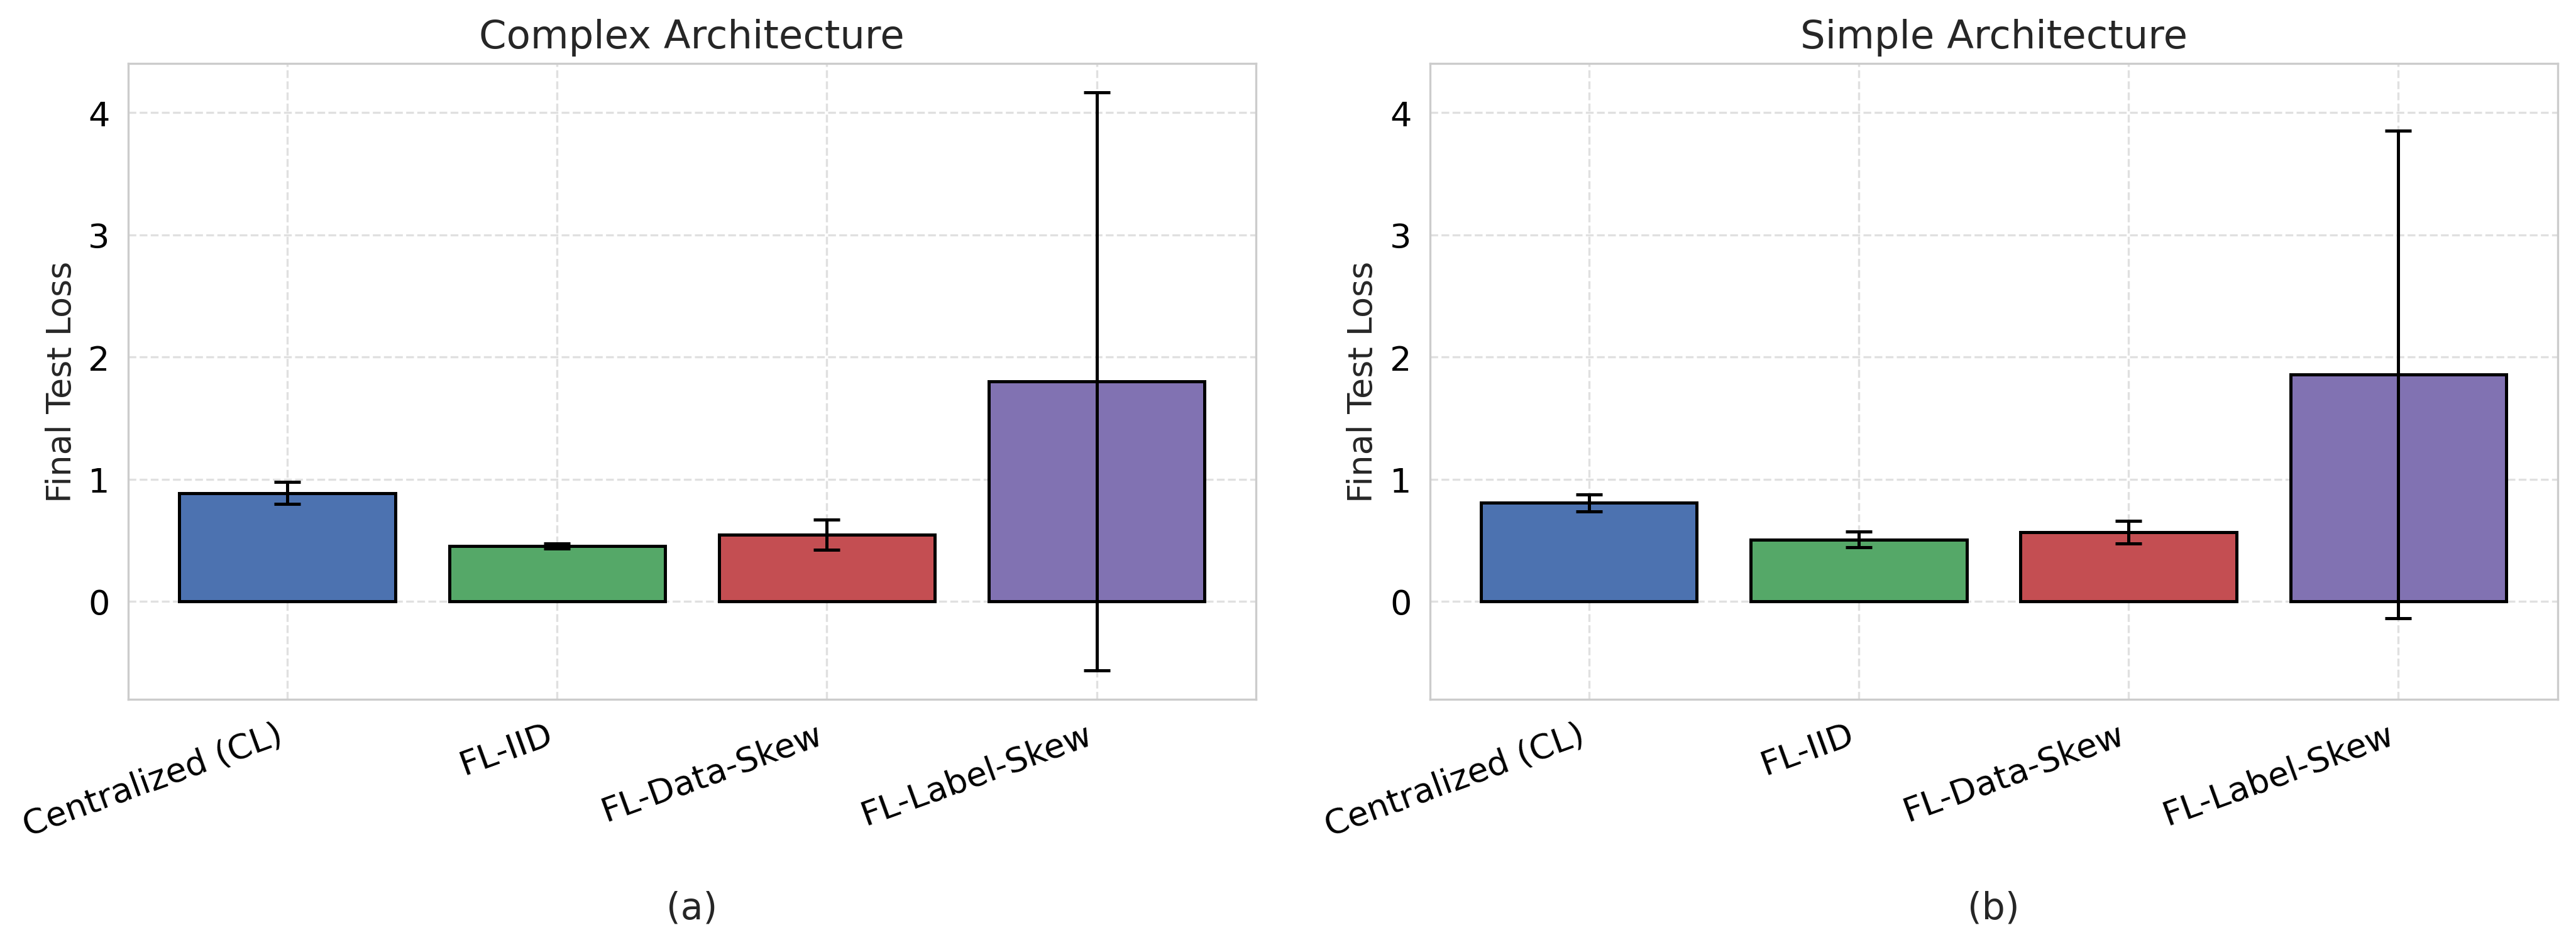

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
import matplotlib.font_manager as fm # Import FontManager for FontProperties

# --- GLOBAL FONT SETTINGS (ADOPTED FROM YOUR STATISTICAL RESULTS PLOT) ---
# This overrides the rcParams in the original block to ensure consistency with the other plot.
plt.rcParams.update({
    'font.family': 'DejaVu Sans', # The font family from your statistical plot
    'font.size': 13,              # The base font size from your statistical plot
    'axes.labelsize': 13,         # Consistent with base font size for axis labels
    'axes.titlesize': 15,         # Consistent with title size from statistical plot
    'xtick.labelsize': 13,        # Consistent with base font size for tick labels
    'ytick.labelsize': 13,        # Consistent with base font size for tick labels
    'figure.dpi': 300,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fontsize': 11,        # Consistent with legend fontsize from statistical plot
    'legend.title_fontsize': 11   # Consistent with legend fontsize from statistical plot
})

# Define explicit font properties based on the statistical plot's standard for clarity
GLOBAL_FONT_FAMILY = plt.rcParams['font.family'][0] # 'DejaVu Sans'
BASE_FONT_SIZE = plt.rcParams['font.size'] # 13

AXES_LABEL_FONT_SIZE = plt.rcParams['axes.labelsize'] # 13
AXES_TITLE_FONT_SIZE = plt.rcParams['axes.titlesize'] # 15
TICK_LABEL_FONT_SIZE = plt.rcParams['xtick.labelsize'] # 13
LEGEND_FONT_SIZE = plt.rcParams['legend.fontsize'] # 11
LEGEND_TITLE_FONT_SIZE = plt.rcParams['legend.title_fontsize'] # 11
SUBPLOT_LABEL_FONT_SIZE = 14 # Explicitly from your statistical plot's (a)/(b) labels

# Create a FontProperties object for legend for robust font family handling
legend_font_prop = fm.FontProperties(family=GLOBAL_FONT_FAMILY, size=LEGEND_FONT_SIZE)
legend_title_font_prop = fm.FontProperties(family=GLOBAL_FONT_FAMILY, size=LEGEND_TITLE_FONT_SIZE)


# Load datasets (assuming paths are correct in your environment)
# Please ensure these paths are correct for your local setup.
cl_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/centralized_results_with_curves.csv')
fl_iid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fedavg_global_results_balanced.csv')
fl_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSkew_1st_fedavg_global_results.csv')
fl_label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fedavg_global_results_label_skew.csv')

# Function to process training loss curves
def process_curves(df, train_col, scenario_name):
    df[train_col] = df[train_col].apply(literal_eval)
    train_curves = []
    for idx, row in df.iterrows():
        for epoch, loss in enumerate(row[train_col], 1):
            train_curves.append({
                'Epoch': epoch,
                'Loss': loss,
                'Scenario': scenario_name,
                'Run': idx + 1,
                'Architecture': row['architecture']
            })
    return pd.DataFrame(train_curves)

# Process and merge training curves
cl_processed = process_curves(cl_df, 'train_loss_curve', 'Centralized (CL)')
iid_processed = process_curves(fl_iid_df, 'train_loss_curve', 'FL-IID')
data_processed = process_curves(fl_data_df, 'train_loss_curve', 'FL-Data-Skew')
label_processed = process_curves(fl_label_df, 'train_loss_curve', 'FL-Label-Skew')
all_data = pd.concat([cl_processed, iid_processed, data_processed, label_processed], ignore_index=True)

# Define styles for scenarios
scenario_styles = {
    'Centralized (CL)': {'color': '#4C72B0'},
    'FL-IID': {'color': '#55A868'},
    'FL-Data-Skew': {'color': '#C44E52'},
    'FL-Label-Skew': {'color': '#8172B2'}
}

# Define markers for training loss curves
# Order should correspond to the order of scenarios in scenario_styles
markers = ['o', 's', '^', 'D'] # Circle, Square, Triangle-up, Diamond

# =================================================================
# TRAINING LOSS COMPARISON (SIDE-BY-SIDE)
# =================================================================
fig_train, axs_train = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax_idx, arch in enumerate(['complex', 'simple']):
    ax = axs_train[ax_idx]
    arch_data = all_data[all_data['Architecture'] == arch]

    for i, (scenario, style) in enumerate(scenario_styles.items()):
        scenario_data = arch_data[arch_data['Scenario'] == scenario]
        mean_loss = scenario_data.groupby('Epoch')['Loss'].mean()
        # std_loss = scenario_data.groupby('Epoch')['Loss'].std() # Commented out as shaded area is removed

        ax.plot(mean_loss.index, mean_loss, label=scenario, linewidth=2,
                marker=markers[i], markersize=5, markevery=max(1, len(mean_loss.index) // 10), # Add markers
                **style)
        # ax.fill_between(mean_loss.index, # Commented out to remove shaded background
        #                 mean_loss - std_loss,
        #                 mean_loss + std_loss,
        #                 color=style['color'],
        #                 alpha=0.2)

    ax.set_yscale('log')
    ax.set_xlabel('Epoch', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_ylabel('Training Loss (log scale)', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.tick_params(axis='x', labelsize=TICK_LABEL_FONT_SIZE, labelcolor='black', labelrotation=0,
                   labelfontfamily=GLOBAL_FONT_FAMILY)
    ax.tick_params(axis='y', which='both', labelleft=True, labelsize=TICK_LABEL_FONT_SIZE, labelcolor='black',
                   labelfontfamily=GLOBAL_FONT_FAMILY)

    ax.set_title(f'{arch.capitalize()} Architecture', fontsize=AXES_TITLE_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.grid(True)

    ax.legend(title='Scenario', frameon=True, loc='upper right',
              prop=legend_font_prop, title_fontproperties=legend_title_font_prop)

    # Add (a) and (b) labels below each subplot
    if arch == 'complex':
        ax.text(0.5, -0.20, '(a)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    elif arch == 'simple':
        ax.text(0.5, -0.20, '(b)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)

# Adjusted rect bottom to make space for labels
plt.tight_layout(rect=[0, 0.02, 1, 0.95]) # Adjusted bottom to ensure labels are visible

plt.savefig('training_loss_comparison-complete.eps', format='eps', bbox_inches='tight')
plt.savefig('training_loss_comparison-complete.tif', dpi=600, bbox_inches='tight')
plt.show()

# =================================================================
# FINAL TEST LOSS COMPARISON (SIDE-BY-SIDE)
# =================================================================
test_loss_data = []
for arch in ['complex', 'simple']:
    test_loss_data.append({
        'Architecture': arch,
        'Centralized (CL)': cl_df[cl_df['architecture'] == arch]['final_test_loss'],
        'FL-IID': fl_iid_df[fl_iid_df['architecture'] == arch]['final_test_loss'],
        'FL-Data-Skew': fl_data_df[fl_data_df['architecture'] == arch]['final_test_loss'],
        'FL-Label-Skew': fl_label_df[fl_label_df['architecture'] == arch]['final_test_loss']
    })

fig_test, axs_test = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax_idx, arch_data in enumerate(test_loss_data):
    ax = axs_test[ax_idx]
    arch = arch_data['Architecture']
    scenarios = list(scenario_styles.keys())

    means = [arch_data[sc].mean() for sc in scenarios]
    stds = [arch_data[sc].std() for sc in scenarios]
    colors = [scenario_styles[sc]['color'] for sc in scenarios]

    x = np.arange(len(scenarios))

    bars = ax.bar(x, means, yerr=stds, capsize=5,
                  color=colors,
                  edgecolor='black',
                  linewidth=1.2,
                  error_kw={'elinewidth': 1.2, 'capthick': 1.2})

    ax.set_title(f'{arch.capitalize()} Architecture', fontsize=AXES_TITLE_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_xticks(x)
    ax.tick_params(axis='x', labelsize=TICK_LABEL_FONT_SIZE, labelcolor='black', rotation=20,
                   labelfontfamily=GLOBAL_FONT_FAMILY)
    ax.tick_params(axis='y', which='both', labelleft=True, labelsize=TICK_LABEL_FONT_SIZE, labelcolor='black',
                   labelfontfamily=GLOBAL_FONT_FAMILY)

    ax.set_xticklabels(scenarios, rotation=20, ha='right', fontsize=TICK_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_ylabel('Final Test Loss', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.grid(True, axis='y')

    # Add (a) and (b) labels below each subplot
    if arch == 'complex':
        ax.text(0.5, -0.30, '(a)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    elif arch == 'simple':
        ax.text(0.5, -0.30, '(b)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)

# Adjusted rect bottom to make space for labels
plt.tight_layout(rect=[0, 0.02, 1, 0.95]) # Adjusted bottom to ensure labels are visible

plt.savefig('test_loss_comparison-complete.eps', format='eps', bbox_inches='tight')
plt.savefig('test_loss_comparison-complete.tif', dpi=600, bbox_inches='tight')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


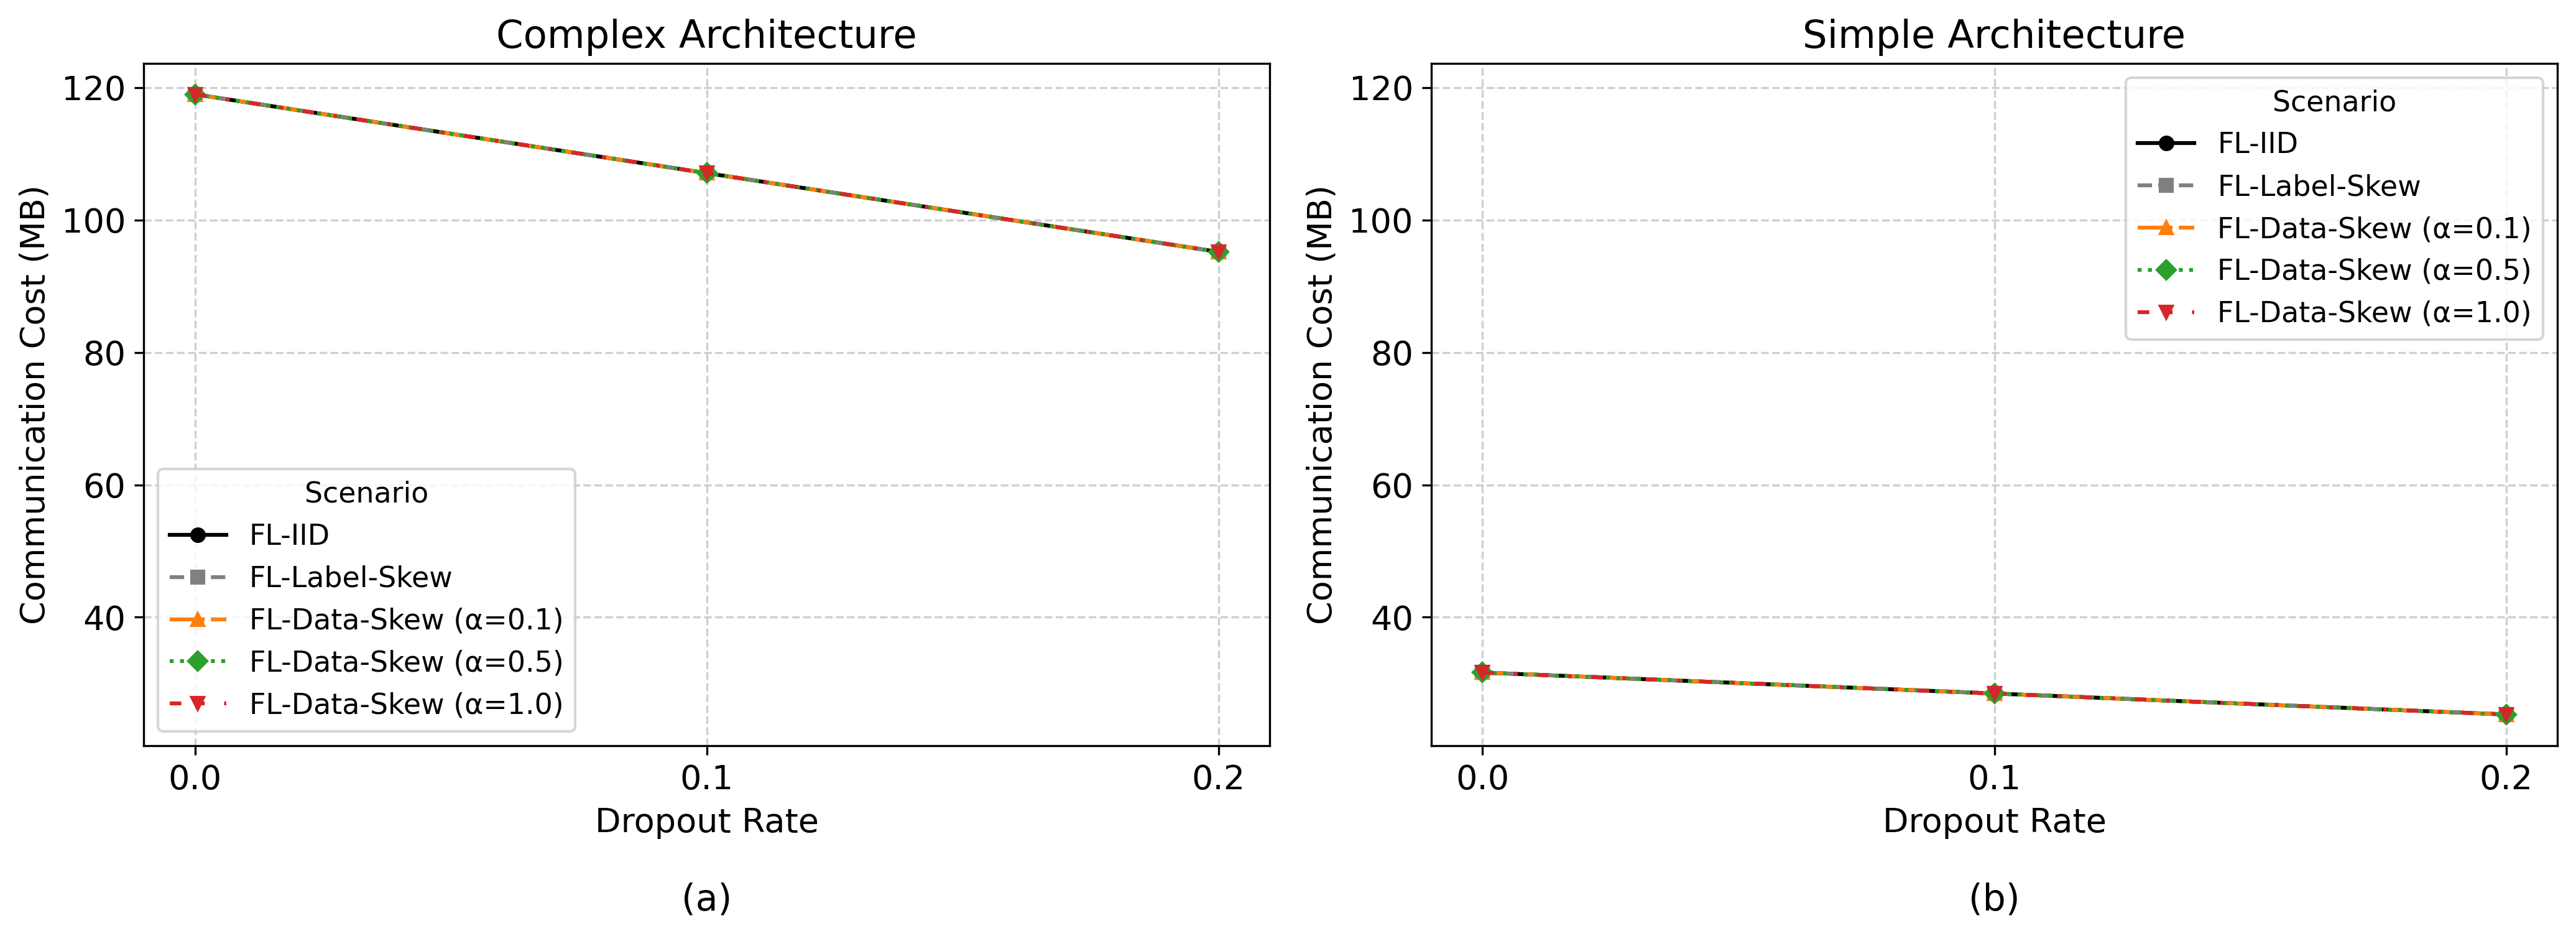

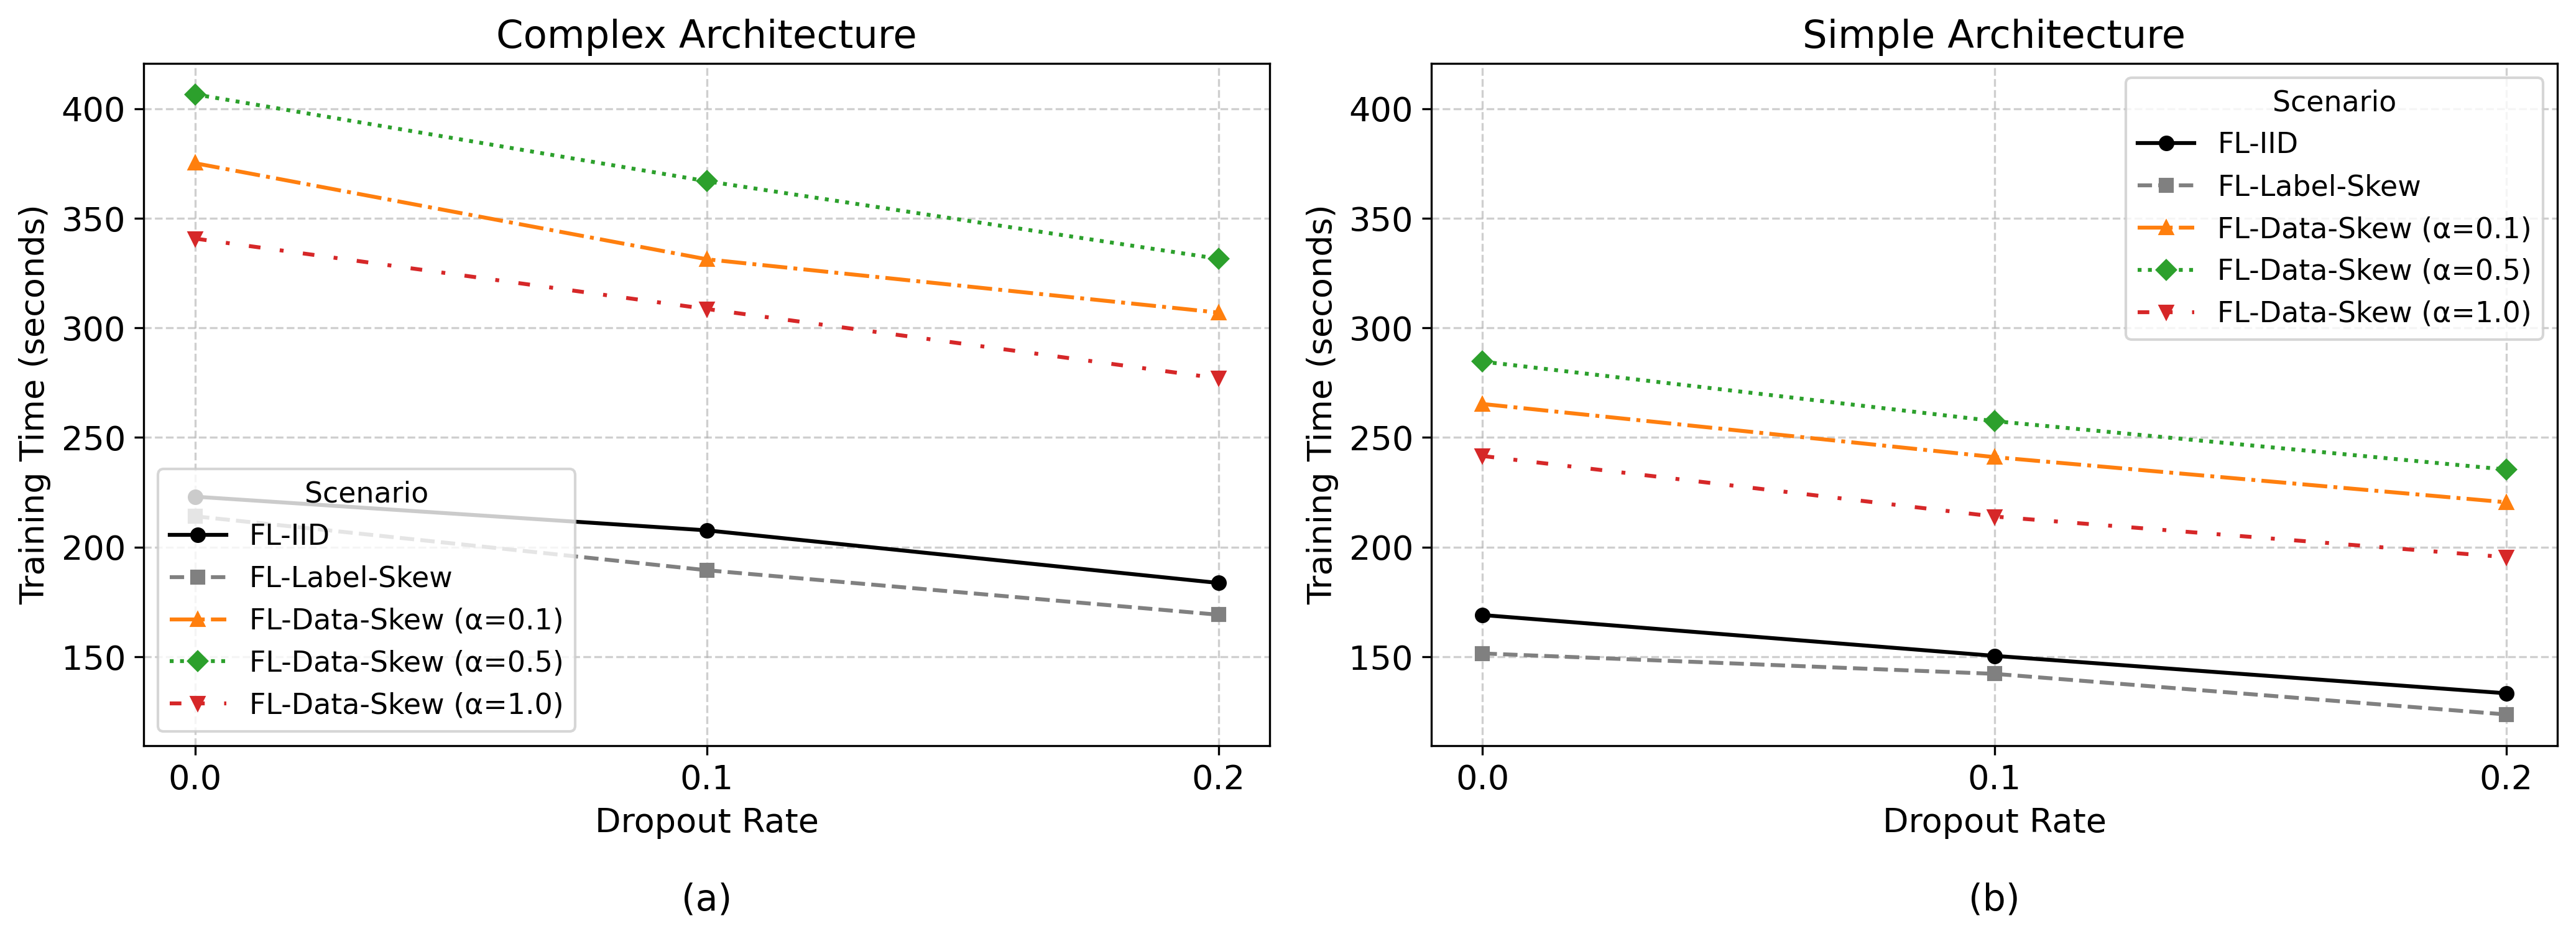

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm # Import FontManager for FontProperties

from google.colab import drive
drive.mount('/content/drive')

# Load datasets
fl_iid_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fedavg_global_results_balanced.csv')
fl_data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSkew_1st_fedavg_global_results.csv')
fl_label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fedavg_global_results_label_skew.csv')

# --- GLOBAL FONT SETTINGS (ADOPTED FOR CONSISTENCY ACROSS ALL FIGURES) ---
plt.rcParams.update({
    'font.family': 'DejaVu Sans', # Consistent font family
    'font.size': 13,              # Consistent base font size
    'axes.labelsize': 13,         # Consistent with base font size for axis labels
    'axes.titlesize': 15,         # Consistent title size
    'xtick.labelsize': 13,        # Consistent tick label size
    'ytick.labelsize': 13,        # Consistent tick label size
    'figure.dpi': 300,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.alpha': 0.6,            # Consistent grid alpha
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fontsize': 11,        # Consistent legend font size
    'legend.title_fontsize': 11   # Consistent legend title font size
})

# Define explicit font properties based on the statistical plot's standard for clarity
GLOBAL_FONT_FAMILY = plt.rcParams['font.family'][0] # 'DejaVu Sans'
BASE_FONT_SIZE = plt.rcParams['font.size'] # 13

AXES_LABEL_FONT_SIZE = plt.rcParams['axes.labelsize'] # 13
AXES_TITLE_FONT_SIZE = plt.rcParams['axes.titlesize'] # 15
TICK_LABEL_FONT_SIZE = plt.rcParams['xtick.labelsize'] # 13
LEGEND_FONT_SIZE = plt.rcParams['legend.fontsize'] # 11
LEGEND_TITLE_FONT_SIZE = plt.rcParams['legend.title_fontsize'] # 11
SUBPLOT_LABEL_FONT_SIZE = 14 # Explicitly from your statistical plot's (a)/(b) labels

# Create FontProperties objects for robust font family handling in legend and text
legend_font_prop = fm.FontProperties(family=GLOBAL_FONT_FAMILY, size=LEGEND_FONT_SIZE)
legend_title_font_prop = fm.FontProperties(family=GLOBAL_FONT_FAMILY, size=LEGEND_TITLE_FONT_SIZE)


# Common params
dropout_rates = [0.0, 0.1, 0.2] # Corrected dropout rates based on typical usage in tables/plots
alphas = sorted(fl_data_df['alpha'].unique()) # This should be [0.1, 0.5, 1.0] as seen in heatmap
architectures = ['complex', 'simple']
# Using a different set of colors for FL-Data-Skew alphas to avoid confusion with scenario colors
# and ensure distinctness
alpha_colors = ['#ff7f0e', '#2ca02c', '#d62728'] # Orange, Green, Red-ish (distinct from default blues/reds)

# Original scenario colors for FL-IID and FL-Label-Skew, ensure they are distinct
scenario_base_colors = {
    'FL-IID': 'black', # Or a distinct blue from original plots like '#4C72B0' for CL
    'FL-Label-Skew': 'grey', # Or a distinct purple from original plots like '#8172B2'
}
# Markers should be unique for each line, including alpha variants
markers_list = ['o', 's', '^', 'D', 'v', '<', '>', 'P', 'X'] # More markers for all lines
line_styles_list = ['-', '--', '-.', ':', (0, (3, 5, 1, 5))] # More line styles

# ================================================
# 1. Communication Cost Figure (Side-by-Side)
# ================================================
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Generate list of scenarios for consistent legend/marker assignment
scenarios_to_plot = ['FL-IID', 'FL-Label-Skew'] + [f'FL-Data-Skew (α={a})' for a in alphas]

for arch_idx, architecture in enumerate(architectures):
    ax = axs1[arch_idx]
    line_counter = 0 # To cycle through markers and line styles

    # FL-IID
    iid_comm = fl_iid_df[fl_iid_df['architecture'] == architecture].groupby('dropout_rate')['comm_cost_mb'].mean()
    ax.plot(dropout_rates, iid_comm,
             label='FL-IID',
             color=scenario_base_colors['FL-IID'],
             marker=markers_list[line_counter],
             markersize=5, # Reduced markersize slightly
             linewidth=1.5,
             linestyle=line_styles_list[line_counter])
    line_counter += 1

    # FL-Label-Skew
    label_comm = fl_label_df[fl_label_df['architecture'] == architecture].groupby('dropout_rate')['comm_cost_mb'].mean()
    ax.plot(dropout_rates, label_comm,
             label='FL-Label-Skew',
             color=scenario_base_colors['FL-Label-Skew'],
             marker=markers_list[line_counter],
             markersize=5, # Reduced markersize slightly
             linewidth=1.5,
             linestyle=line_styles_list[line_counter])
    line_counter += 1

    # FL-Data-Skew for each alpha
    for i, alpha in enumerate(alphas):
        alpha_comm = fl_data_df[(fl_data_df['architecture'] == architecture) &
                                (fl_data_df['alpha'] == alpha)].groupby('dropout_rate')['comm_cost_mb'].mean()
        ax.plot(dropout_rates, alpha_comm,
                 label=f'FL-Data-Skew (α={alpha})',
                 color=alpha_colors[i], # Use specific alpha colors
                 marker=markers_list[line_counter],
                 markersize=5, # Reduced markersize slightly
                 linewidth=1.5,
                 linestyle=line_styles_list[line_counter])
        line_counter += 1

    ax.set_title(f'{architecture.capitalize()} Architecture', fontsize=AXES_TITLE_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_xlabel('Dropout Rate', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_ylabel('Communication Cost (MB)', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_xticks(dropout_rates)
    ax.set_xticklabels([str(x) for x in dropout_rates], fontsize=TICK_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.tick_params(axis='y', which='both', labelleft=True, labelsize=TICK_LABEL_FONT_SIZE, labelfontfamily=GLOBAL_FONT_FAMILY)
    ax.grid(True)
    ax.legend(title='Scenario', loc='best',
              prop=legend_font_prop, title_fontproperties=legend_title_font_prop)

    # Add (a) and (b) labels
    if architecture == 'complex':
        ax.text(0.5, -0.20, '(a)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    elif architecture == 'simple':
        ax.text(0.5, -0.20, '(b)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjusted rect bottom for (a)/(b) labels
plt.savefig('fl_communication_cost_side_by_side-final.png', dpi=300, bbox_inches='tight')
plt.savefig('fl_communication_cost_side_by_side-final.eps', format='eps', bbox_inches='tight')
plt.show()


# ================================================
# 2. Training Time Figure (Side-by-Side)
# ================================================
fig2, axs2 = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for arch_idx, architecture in enumerate(architectures):
    ax = axs2[arch_idx]
    line_counter = 0 # Reset line counter for this plot

    # FL-IID
    iid_time = fl_iid_df[fl_iid_df['architecture'] == architecture].groupby('dropout_rate')['train_time_sec'].mean()
    ax.plot(dropout_rates, iid_time,
             label='FL-IID',
             color=scenario_base_colors['FL-IID'],
             marker=markers_list[line_counter],
             markersize=5,
             linewidth=1.5,
             linestyle=line_styles_list[line_counter])
    line_counter += 1

    # FL-Label-Skew
    label_time = fl_label_df[fl_label_df['architecture'] == architecture].groupby('dropout_rate')['train_time_sec'].mean()
    ax.plot(dropout_rates, label_time,
             label='FL-Label-Skew',
             color=scenario_base_colors['FL-Label-Skew'],
             marker=markers_list[line_counter],
             markersize=5,
             linewidth=1.5,
             linestyle=line_styles_list[line_counter])
    line_counter += 1

    # FL-Data-Skew for each alpha
    for i, alpha in enumerate(alphas):
        alpha_time = fl_data_df[(fl_data_df['architecture'] == architecture) &
                                (fl_data_df['alpha'] == alpha)].groupby('dropout_rate')['train_time_sec'].mean()
        ax.plot(dropout_rates, alpha_time,
                 label=f'FL-Data-Skew (α={alpha})',
                 color=alpha_colors[i], # Use specific alpha colors
                 marker=markers_list[line_counter],
                 markersize=5,
                 linewidth=1.5,
                 linestyle=line_styles_list[line_counter])
        line_counter += 1

    ax.set_title(f'{architecture.capitalize()} Architecture', fontsize=AXES_TITLE_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_xlabel('Dropout Rate', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_ylabel('Training Time (seconds)', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.set_xticks(dropout_rates)
    ax.set_xticklabels([str(x) for x in dropout_rates], fontsize=TICK_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.tick_params(axis='y', which='both', labelleft=True, labelsize=TICK_LABEL_FONT_SIZE, labelfontfamily=GLOBAL_FONT_FAMILY)
    ax.grid(True)
    ax.legend(title='Scenario', loc='best',
              prop=legend_font_prop, title_fontproperties=legend_title_font_prop)

    # Add (a) and (b) labels
    if architecture == 'complex':
        ax.text(0.5, -0.20, '(a)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    elif architecture == 'simple':
        ax.text(0.5, -0.20, '(b)', transform=ax.transAxes,
                ha='center', va='top',
                fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)

plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjusted rect bottom for (a)/(b) labels
plt.savefig('fl_training_time_side_by_side-final.png', dpi=300, bbox_inches='tight')
plt.savefig('fl_training_time_side_by_side-final.eps', format='eps', bbox_inches='tight') # Ensure EPS output
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


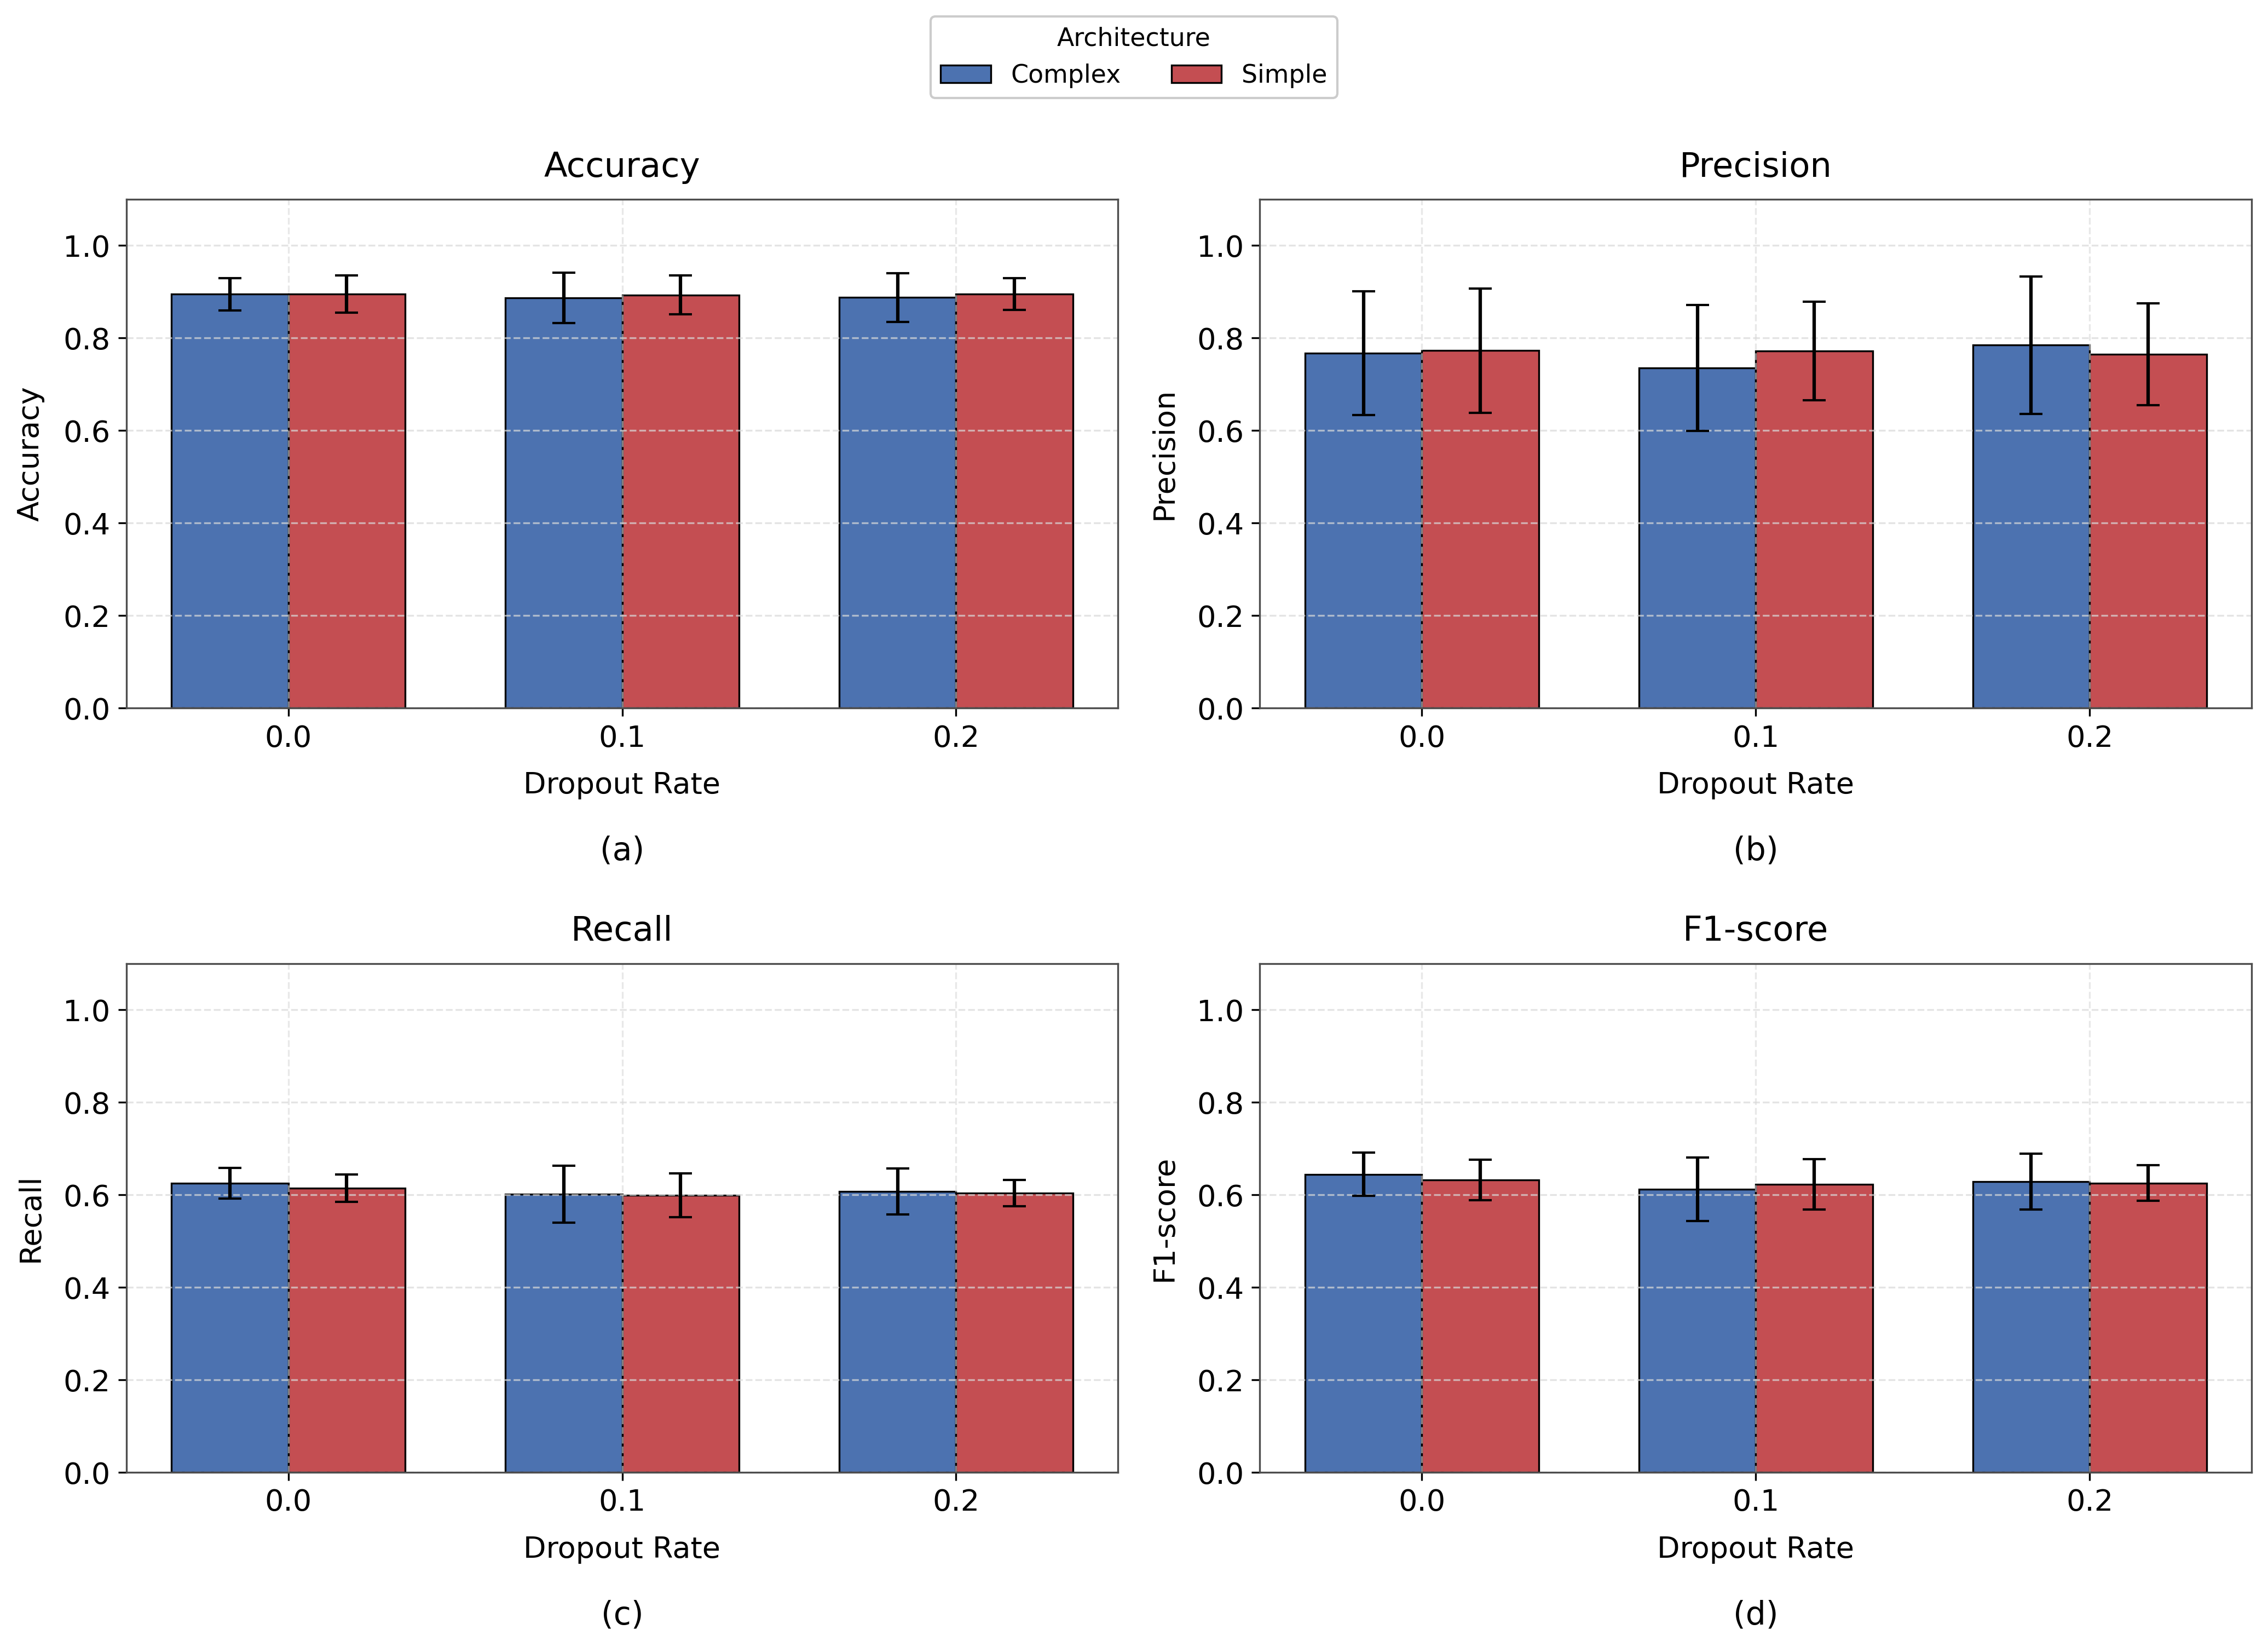

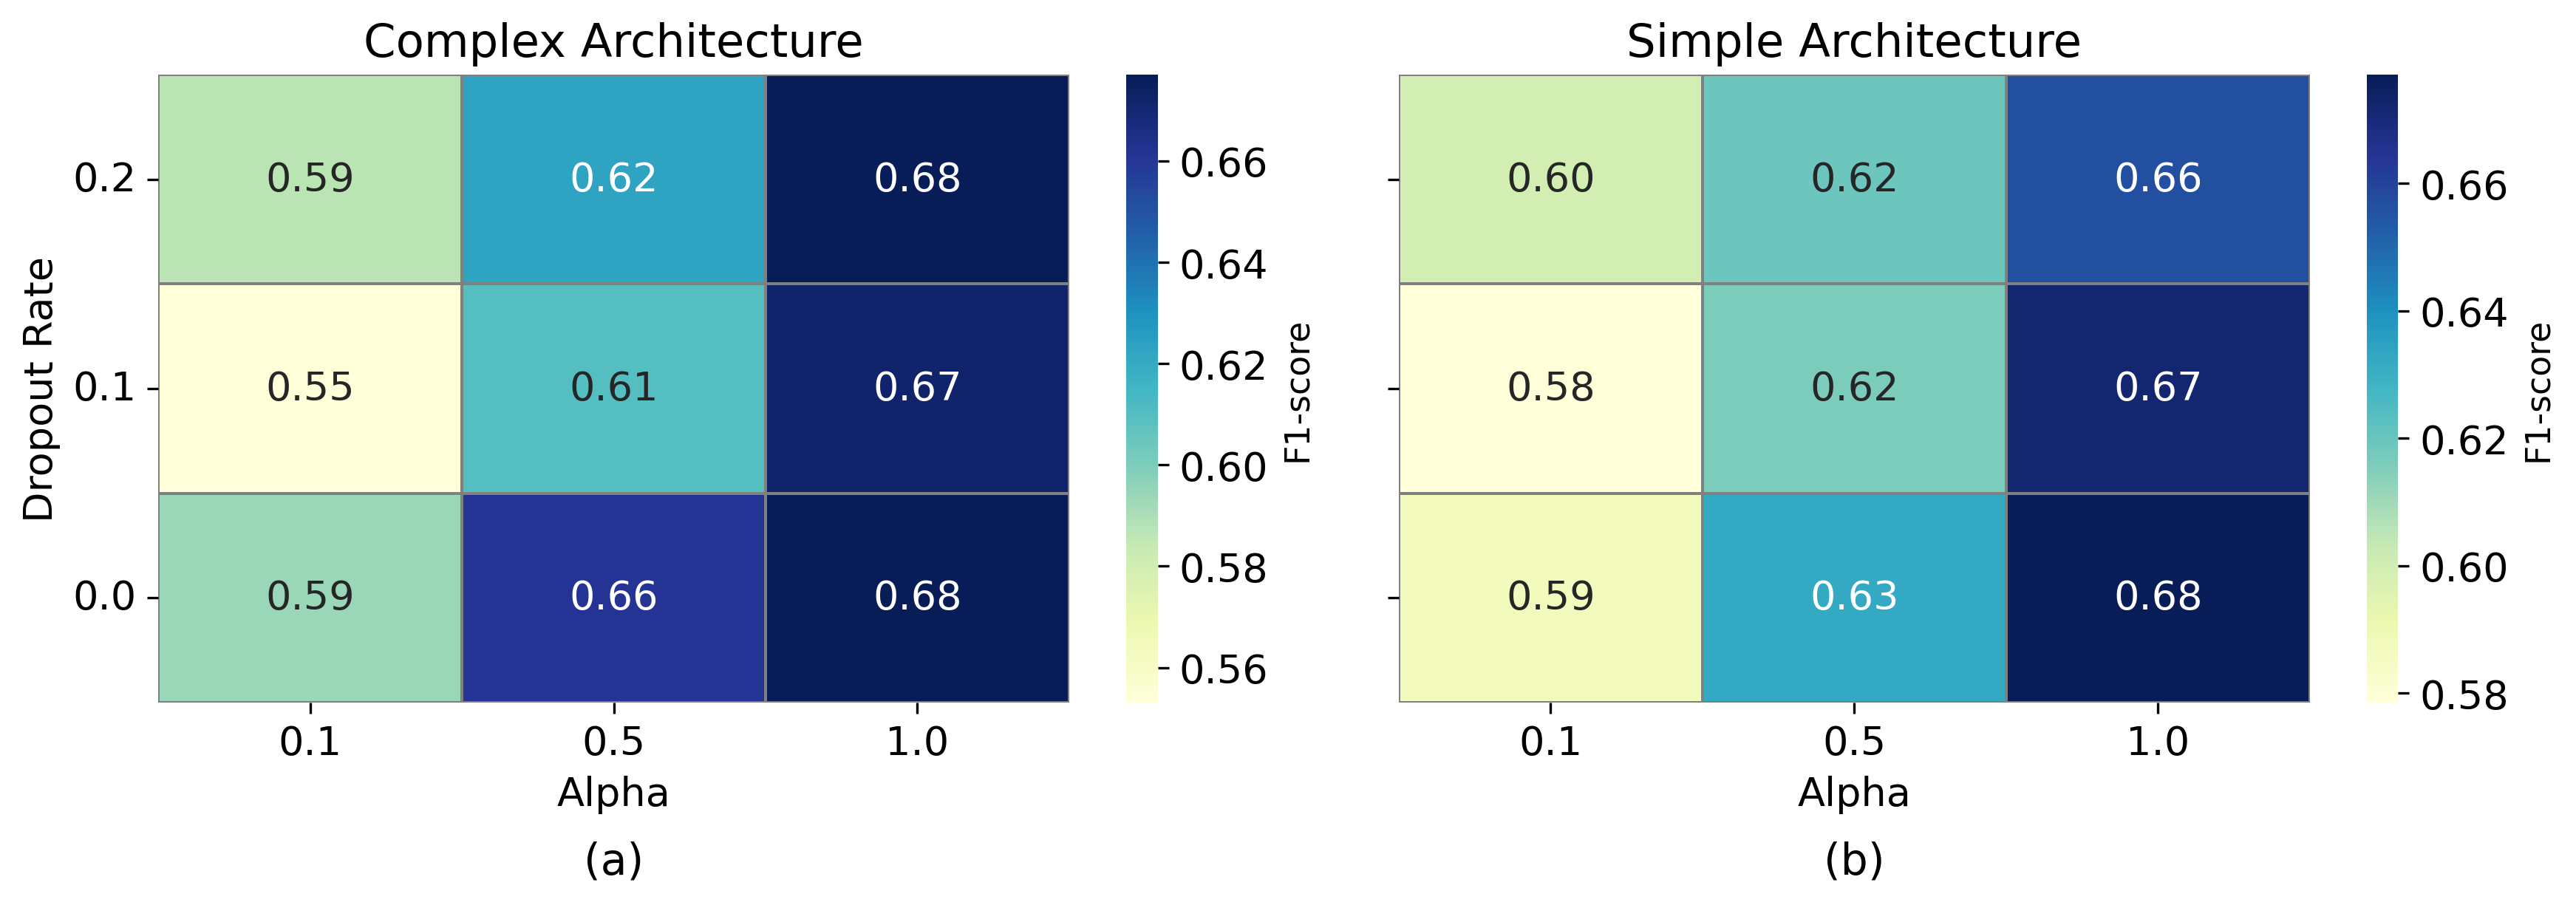

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Load datasets
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataSkew_1st_fedavg_global_results.csv')

# Ensure dropout is in proper format
df['dropout_rate'] = df['dropout_rate'].round(1)

# --- GLOBAL FONT SETTINGS (ADOPTED FOR CONSISTENCY ACROSS ALL FIGURES) ---
plt.rcParams.update({
    'font.family': 'DejaVu Sans', # Consistent font family
    'font.size': 13,              # Consistent base font size for text
    'axes.labelsize': 13,         # Consistent with base font size for axis labels
    'axes.titlesize': 15,         # Consistent title size
    'xtick.labelsize': 13,        # Consistent tick label size
    'ytick.labelsize': 13,        # Consistent tick label size
    'figure.dpi': 300,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.grid': True,            # Keep global grid for non-heatmap plots by default
    'grid.linestyle': '--',
    'grid.alpha': 0.6,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fontsize': 11,
    'legend.title_fontsize': 11,
    'axes.edgecolor': '0.3',
    'grid.color': '0.85'
})

# Define explicit font properties for robust handling
GLOBAL_FONT_FAMILY = plt.rcParams['font.family'][0]
AXES_LABEL_FONT_SIZE = plt.rcParams['axes.labelsize']
AXES_TITLE_FONT_SIZE = plt.rcParams['axes.titlesize']
TICK_LABEL_FONT_SIZE = plt.rcParams['xtick.labelsize']
LEGEND_FONT_SIZE = plt.rcParams['legend.fontsize']
LEGEND_TITLE_FONT_SIZE = plt.rcParams['legend.title_fontsize']
SUBPLOT_LABEL_FONT_SIZE = 14 # Used for (a), (b), (c), (d)

# Create FontProperties objects for robust font family handling
legend_font_prop = fm.FontProperties(family=GLOBAL_FONT_FAMILY, size=LEGEND_FONT_SIZE)
legend_title_font_prop = fm.FontProperties(family=GLOBAL_FONT_FAMILY, size=LEGEND_TITLE_FONT_SIZE)


# Define color scheme
arch_colors = {
    'complex': '#4C72B0',  # Blue
    'simple': '#C44E52'    # Red
}

# Metrics to plot and their corresponding subplot labels
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-score']
subplot_labels_bar_chart = ['(a)', '(b)', '(c)', '(d)'] # For the 4-panel plot

# ================================================
# Performance Metrics Bar Chart
# ================================================
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Define bar width and positions
bar_width = 0.35
dropout_rates = sorted(df['dropout_rate'].unique())
x = np.arange(len(dropout_rates))

for i, metric in enumerate(metrics):
    ax = axs[i]

    # Calculate means and stds for each architecture
    complex_data = df[df['architecture'] == 'complex'].groupby('dropout_rate')[metric].agg(['mean', 'std'])
    simple_data = df[df['architecture'] == 'simple'].groupby('dropout_rate')[metric].agg(['mean', 'std'])

    # Plot bars with error caps
    ax.bar(x - bar_width/2, complex_data['mean'],
           width=bar_width, color=arch_colors['complex'],
           edgecolor='black', linewidth=0.8,
           label='Complex', yerr=complex_data['std'],
           capsize=5, error_kw={'linewidth': 1.5})

    ax.bar(x + bar_width/2, simple_data['mean'],
           width=bar_width, color=arch_colors['simple'],
           edgecolor='black', linewidth=0.8,
           label='Simple', yerr=simple_data['std'],
           capsize=5, error_kw={'linewidth': 1.5})

    ax.set_title(titles[i], fontsize=AXES_TITLE_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY, pad=10)
    ax.set_xlabel('Dropout Rate', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY, labelpad=8)
    ax.set_ylabel(titles[i], fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY, labelpad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(dropout_rates, fontsize=TICK_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
    ax.tick_params(axis='y', which='both', labelsize=TICK_LABEL_FONT_SIZE, labelfontfamily=GLOBAL_FONT_FAMILY)
    ax.set_ylim(0, 1.1)  # Adjust based on your metric range
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Add (a), (b), (c), (d) labels underneath each subplot, horizontally centered
    ax.text(0.5, -0.25, subplot_labels_bar_chart[i], transform=ax.transAxes, # Adjusted Y position to -0.25
            ha='center', va='top', fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)

# Add unified legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Architecture',
           loc='upper center', bbox_to_anchor=(0.5, 1.02),
           ncol=2, framealpha=1,
           prop=legend_font_prop, title_fontproperties=legend_title_font_prop)

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjusted rect for subplot labels
plt.savefig('fl_data_skew_metrics_bar-finalized.png', dpi=300, bbox_inches='tight')
plt.savefig('fl_data_skew_metrics_bar-finalized.eps', format='eps', bbox_inches='tight')
plt.show()

# ================================================
# F1-score Heatmap - Side-by-Side
# ================================================

# Prepare data
pivot_df = df.groupby(['architecture', 'dropout_rate', 'alpha'])['f1_score'].mean().reset_index()
complex_heatmap = pivot_df[pivot_df['architecture'] == 'complex'].pivot(index='dropout_rate', columns='alpha', values='f1_score')
simple_heatmap = pivot_df[pivot_df['architecture'] == 'simple'].pivot(index='dropout_rate', columns='alpha', values='f1_score')

# Sort dropout rate in descending order for better heatmap visualization (top is higher dropout)
complex_heatmap = complex_heatmap.sort_index(ascending=False).sort_index(axis=1)
simple_heatmap = simple_heatmap.sort_index(ascending=False).sort_index(axis=1)


# Plot side-by-side heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Complex Architecture Heatmap (a)
im1 = sns.heatmap(complex_heatmap, annot=True, fmt=".2f", cmap="YlGnBu",
            linewidths=0.5, linecolor='gray', ax=axes[0], cbar=True,
            cbar_kws={'label': 'F1-score'})
axes[0].set_title('Complex Architecture', fontsize=AXES_TITLE_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
axes[0].set_xlabel('Alpha', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
axes[0].set_ylabel('Dropout Rate', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
axes[0].tick_params(axis='x', labelsize=TICK_LABEL_FONT_SIZE, labelfontfamily=GLOBAL_FONT_FAMILY)
axes[0].tick_params(axis='y', labelsize=TICK_LABEL_FONT_SIZE, labelfontfamily=GLOBAL_FONT_FAMILY, rotation=0)
axes[0].grid(False) # Explicitly turn off grid for heatmap

# Set colorbar label font properties AFTER heatmap creation
cbar1_obj = im1.collections[0].colorbar
cbar1_obj.set_label('F1-score') # Set label text
cbar1_obj.ax.yaxis.label.set_fontsize(LEGEND_FONT_SIZE) # Set label font size
cbar1_obj.ax.yaxis.label.set_fontfamily(GLOBAL_FONT_FAMILY) # Set label font family

# Add (a) label underneath
axes[0].text(0.5, -0.22, '(a)', transform=axes[0].transAxes,
             ha='center', va='top', fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)


# Simple Architecture Heatmap (b)
im2 = sns.heatmap(simple_heatmap, annot=True, fmt=".2f", cmap="YlGnBu",
            linewidths=0.5, linecolor='gray', ax=axes[1], cbar=True,
            cbar_kws={'label': 'F1-score'})
axes[1].set_title('Simple Architecture', fontsize=AXES_TITLE_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
axes[1].set_xlabel('Alpha', fontsize=AXES_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)
axes[1].set_ylabel('') # Hide y-label as it's shared
axes[1].tick_params(axis='x', labelsize=TICK_LABEL_FONT_SIZE, labelfontfamily=GLOBAL_FONT_FAMILY)
axes[1].tick_params(axis='y', labelsize=TICK_LABEL_FONT_SIZE, labelfontfamily=GLOBAL_FONT_FAMILY, rotation=0)
axes[1].grid(False) # Explicitly turn off grid for heatmap

# Set colorbar label font properties AFTER heatmap creation
cbar2_obj = im2.collections[0].colorbar
cbar2_obj.set_label('F1-score') # Set label text
cbar2_obj.ax.yaxis.label.set_fontsize(LEGEND_FONT_SIZE) # Set label font size
cbar2_obj.ax.yaxis.label.set_fontfamily(GLOBAL_FONT_FAMILY) # Set label font family


# Add (b) label underneath
axes[1].text(0.5, -0.22, '(b)', transform=axes[1].transAxes,
             ha='center', va='top', fontsize=SUBPLOT_LABEL_FONT_SIZE, fontname=GLOBAL_FONT_FAMILY)


plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjusted rect to make space for (a)/(b) labels
plt.savefig('f1score_heatmap_side_by_side-final.png', dpi=300, bbox_inches='tight')
plt.savefig('f1score_heatmap_side_by_side-final.eps', format='eps', bbox_inches='tight')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


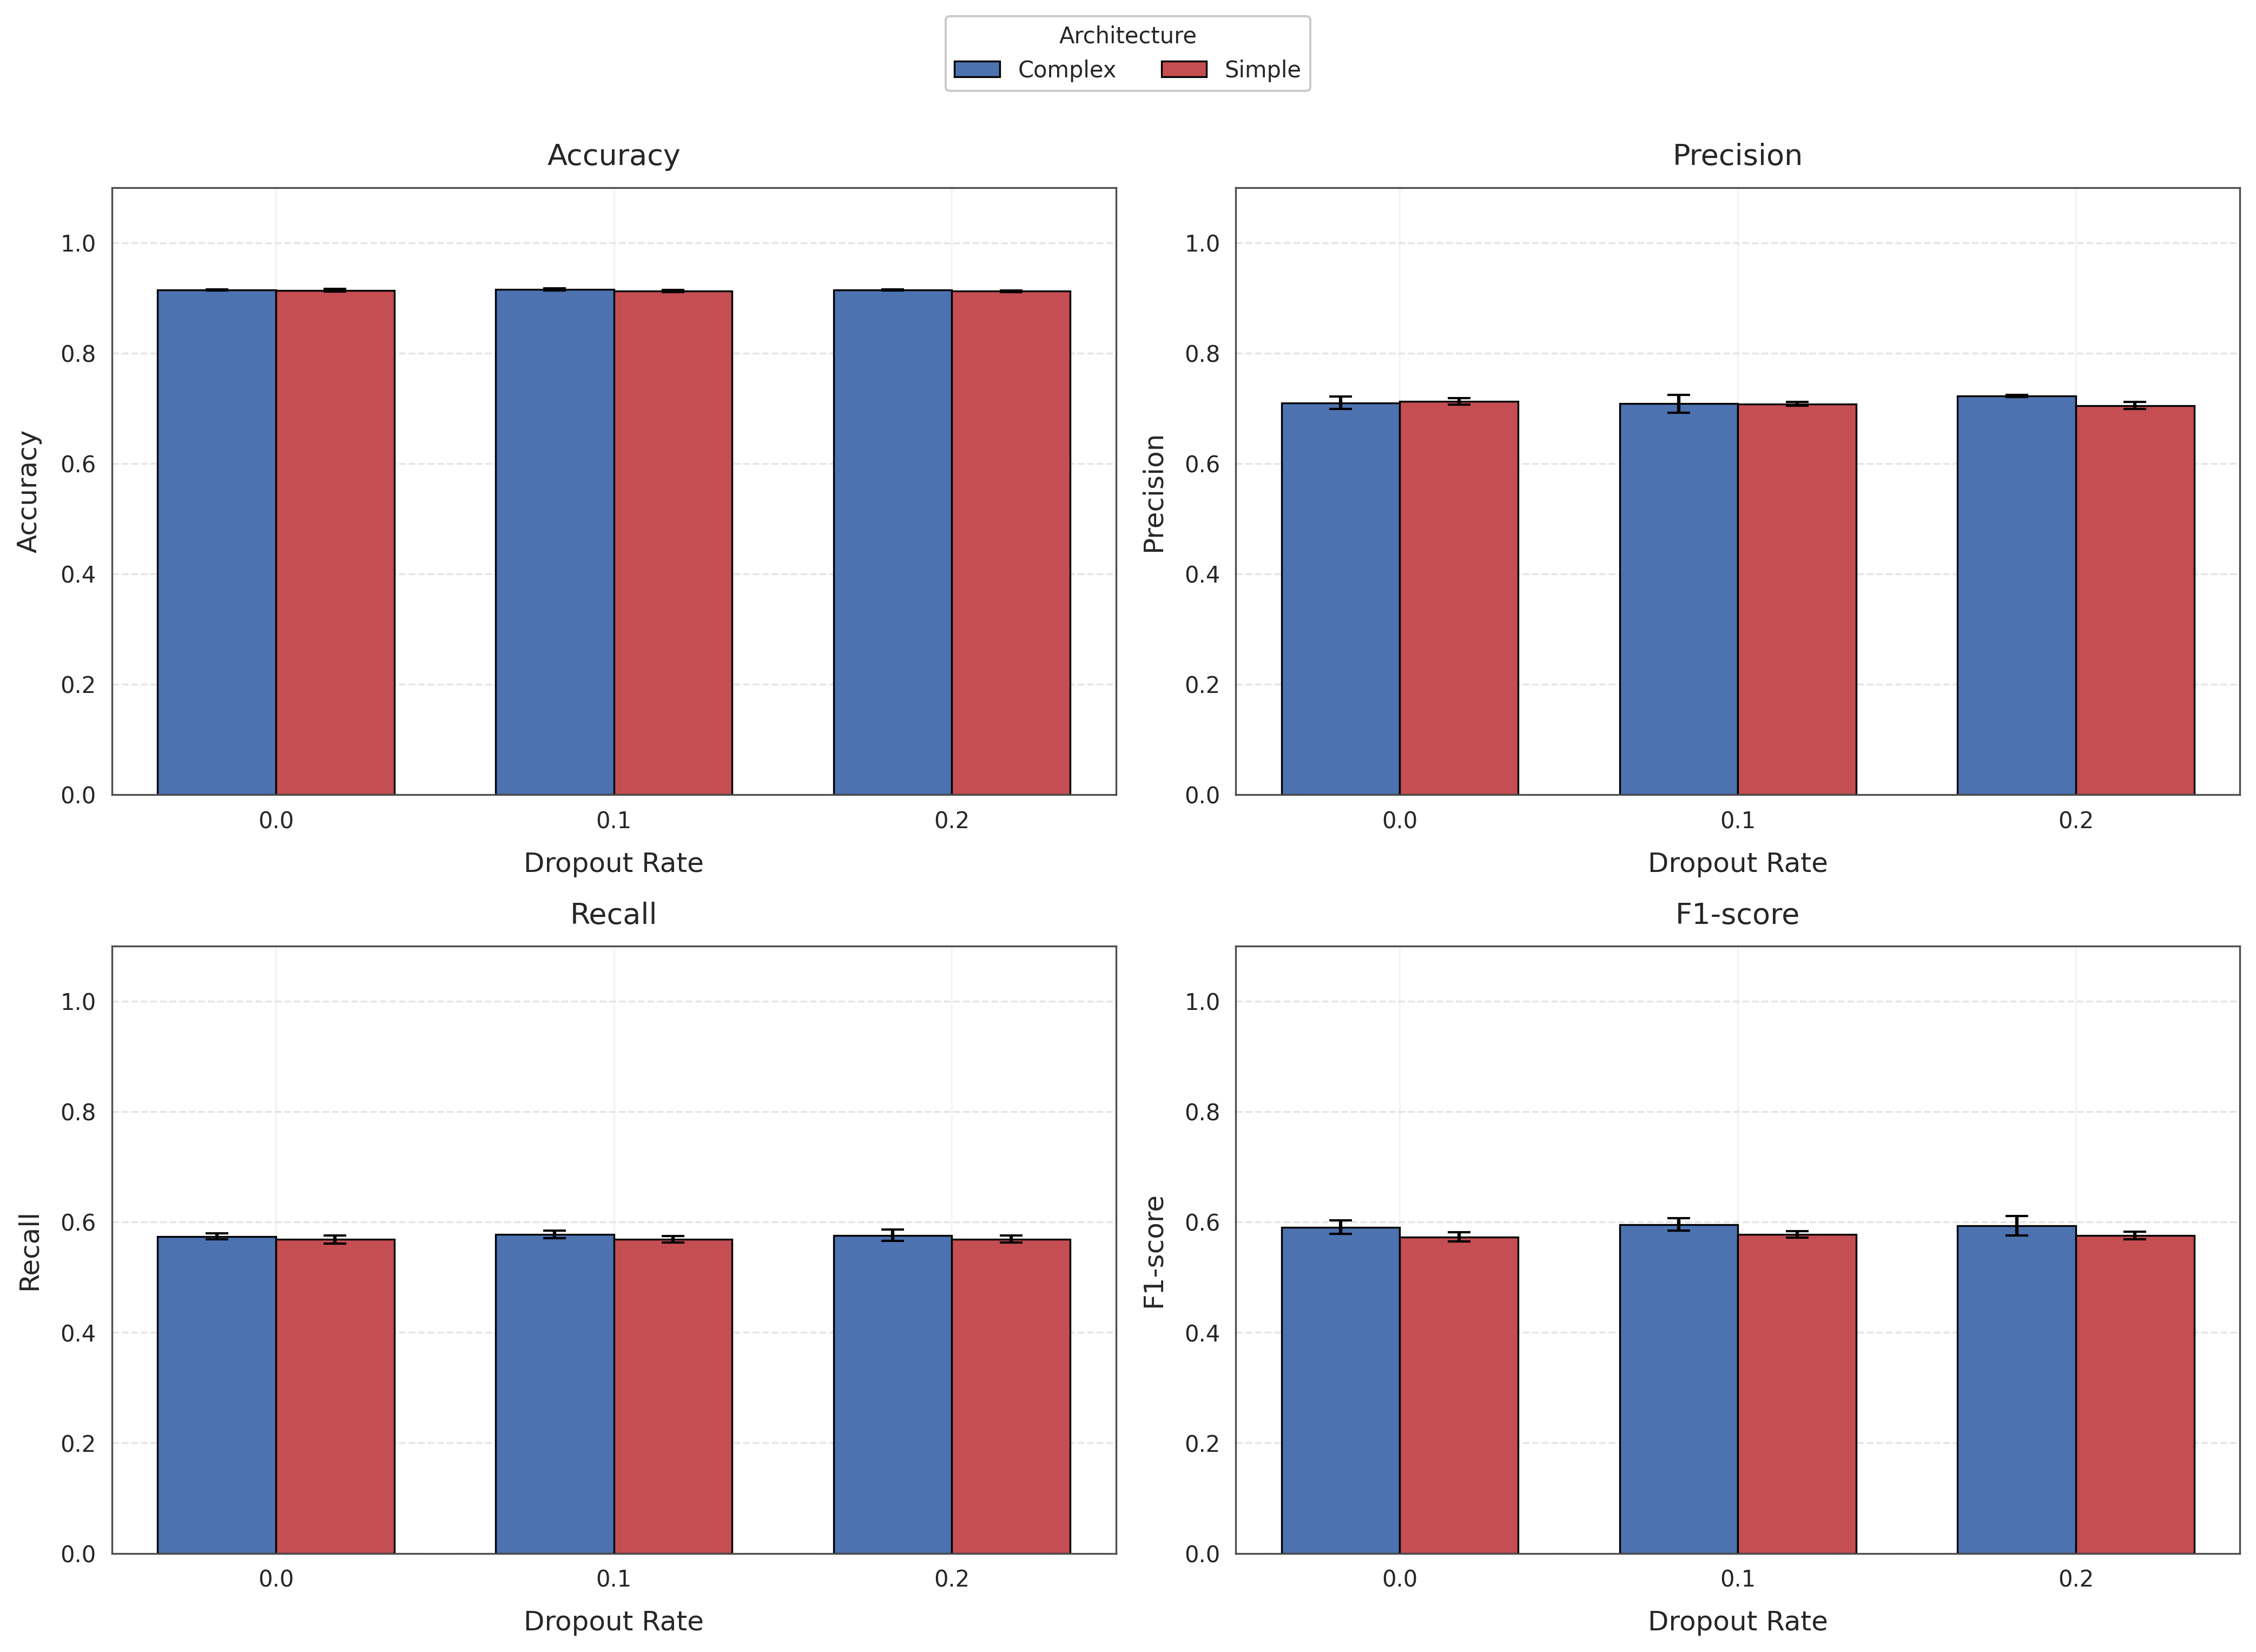

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

# Set global styles with improved aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'axes.edgecolor': '0.3',
    'grid.color': '0.85'
})

# Load FL-Data-Skew results
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fedavg_global_results_balanced.csv')

# Ensure dropout is in proper format
df['dropout_rate'] = df['dropout_rate'].round(1)



# Define color scheme
arch_colors = {
    'complex': '#4C72B0',  # Blue
    'simple': '#C44E52'    # Red
}

# Metrics to plot
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Define bar width and positions
bar_width = 0.35
dropout_rates = sorted(df['dropout_rate'].unique())
x = np.arange(len(dropout_rates))

for i, metric in enumerate(metrics):
    ax = axs[i]

    # Calculate means and stds for each architecture
    complex_data = df[df['architecture'] == 'complex'].groupby('dropout_rate')[metric].agg(['mean', 'std'])
    simple_data = df[df['architecture'] == 'simple'].groupby('dropout_rate')[metric].agg(['mean', 'std'])

    # Plot bars with error caps
    complex_bars = ax.bar(x - bar_width/2, complex_data['mean'],
                         width=bar_width, color=arch_colors['complex'],
                         edgecolor='black', linewidth=0.8,
                         label='Complex', yerr=complex_data['std'],
                         capsize=5, error_kw={'linewidth': 1.5})

    simple_bars = ax.bar(x + bar_width/2, simple_data['mean'],
                        width=bar_width, color=arch_colors['simple'],
                        edgecolor='black', linewidth=0.8,
                        label='Simple', yerr=simple_data['std'],
                        capsize=5, error_kw={'linewidth': 1.5})



    ax.set_title(titles[i], fontsize=13, pad=10)
    ax.set_xlabel('Dropout Rate', labelpad=8)
    ax.set_ylabel(titles[i], labelpad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(dropout_rates)
    ax.set_ylim(0, 1.1)  # Adjust based on your metric range
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add unified legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Architecture',
           loc='upper center', bbox_to_anchor=(0.5, 1.02),
           ncol=2, framealpha=1)

#plt.suptitle('FL-Data-Skew: Performance Metrics vs Dropout Rate',
           #  fontsize=16, y=1.05, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('fl_data_balanced_metrics_bar-finalized.png', dpi=300, bbox_inches='tight')
plt.savefig('fl_data_balanced_metrics_bar-finalized.eps', format='eps', bbox_inches='tight')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


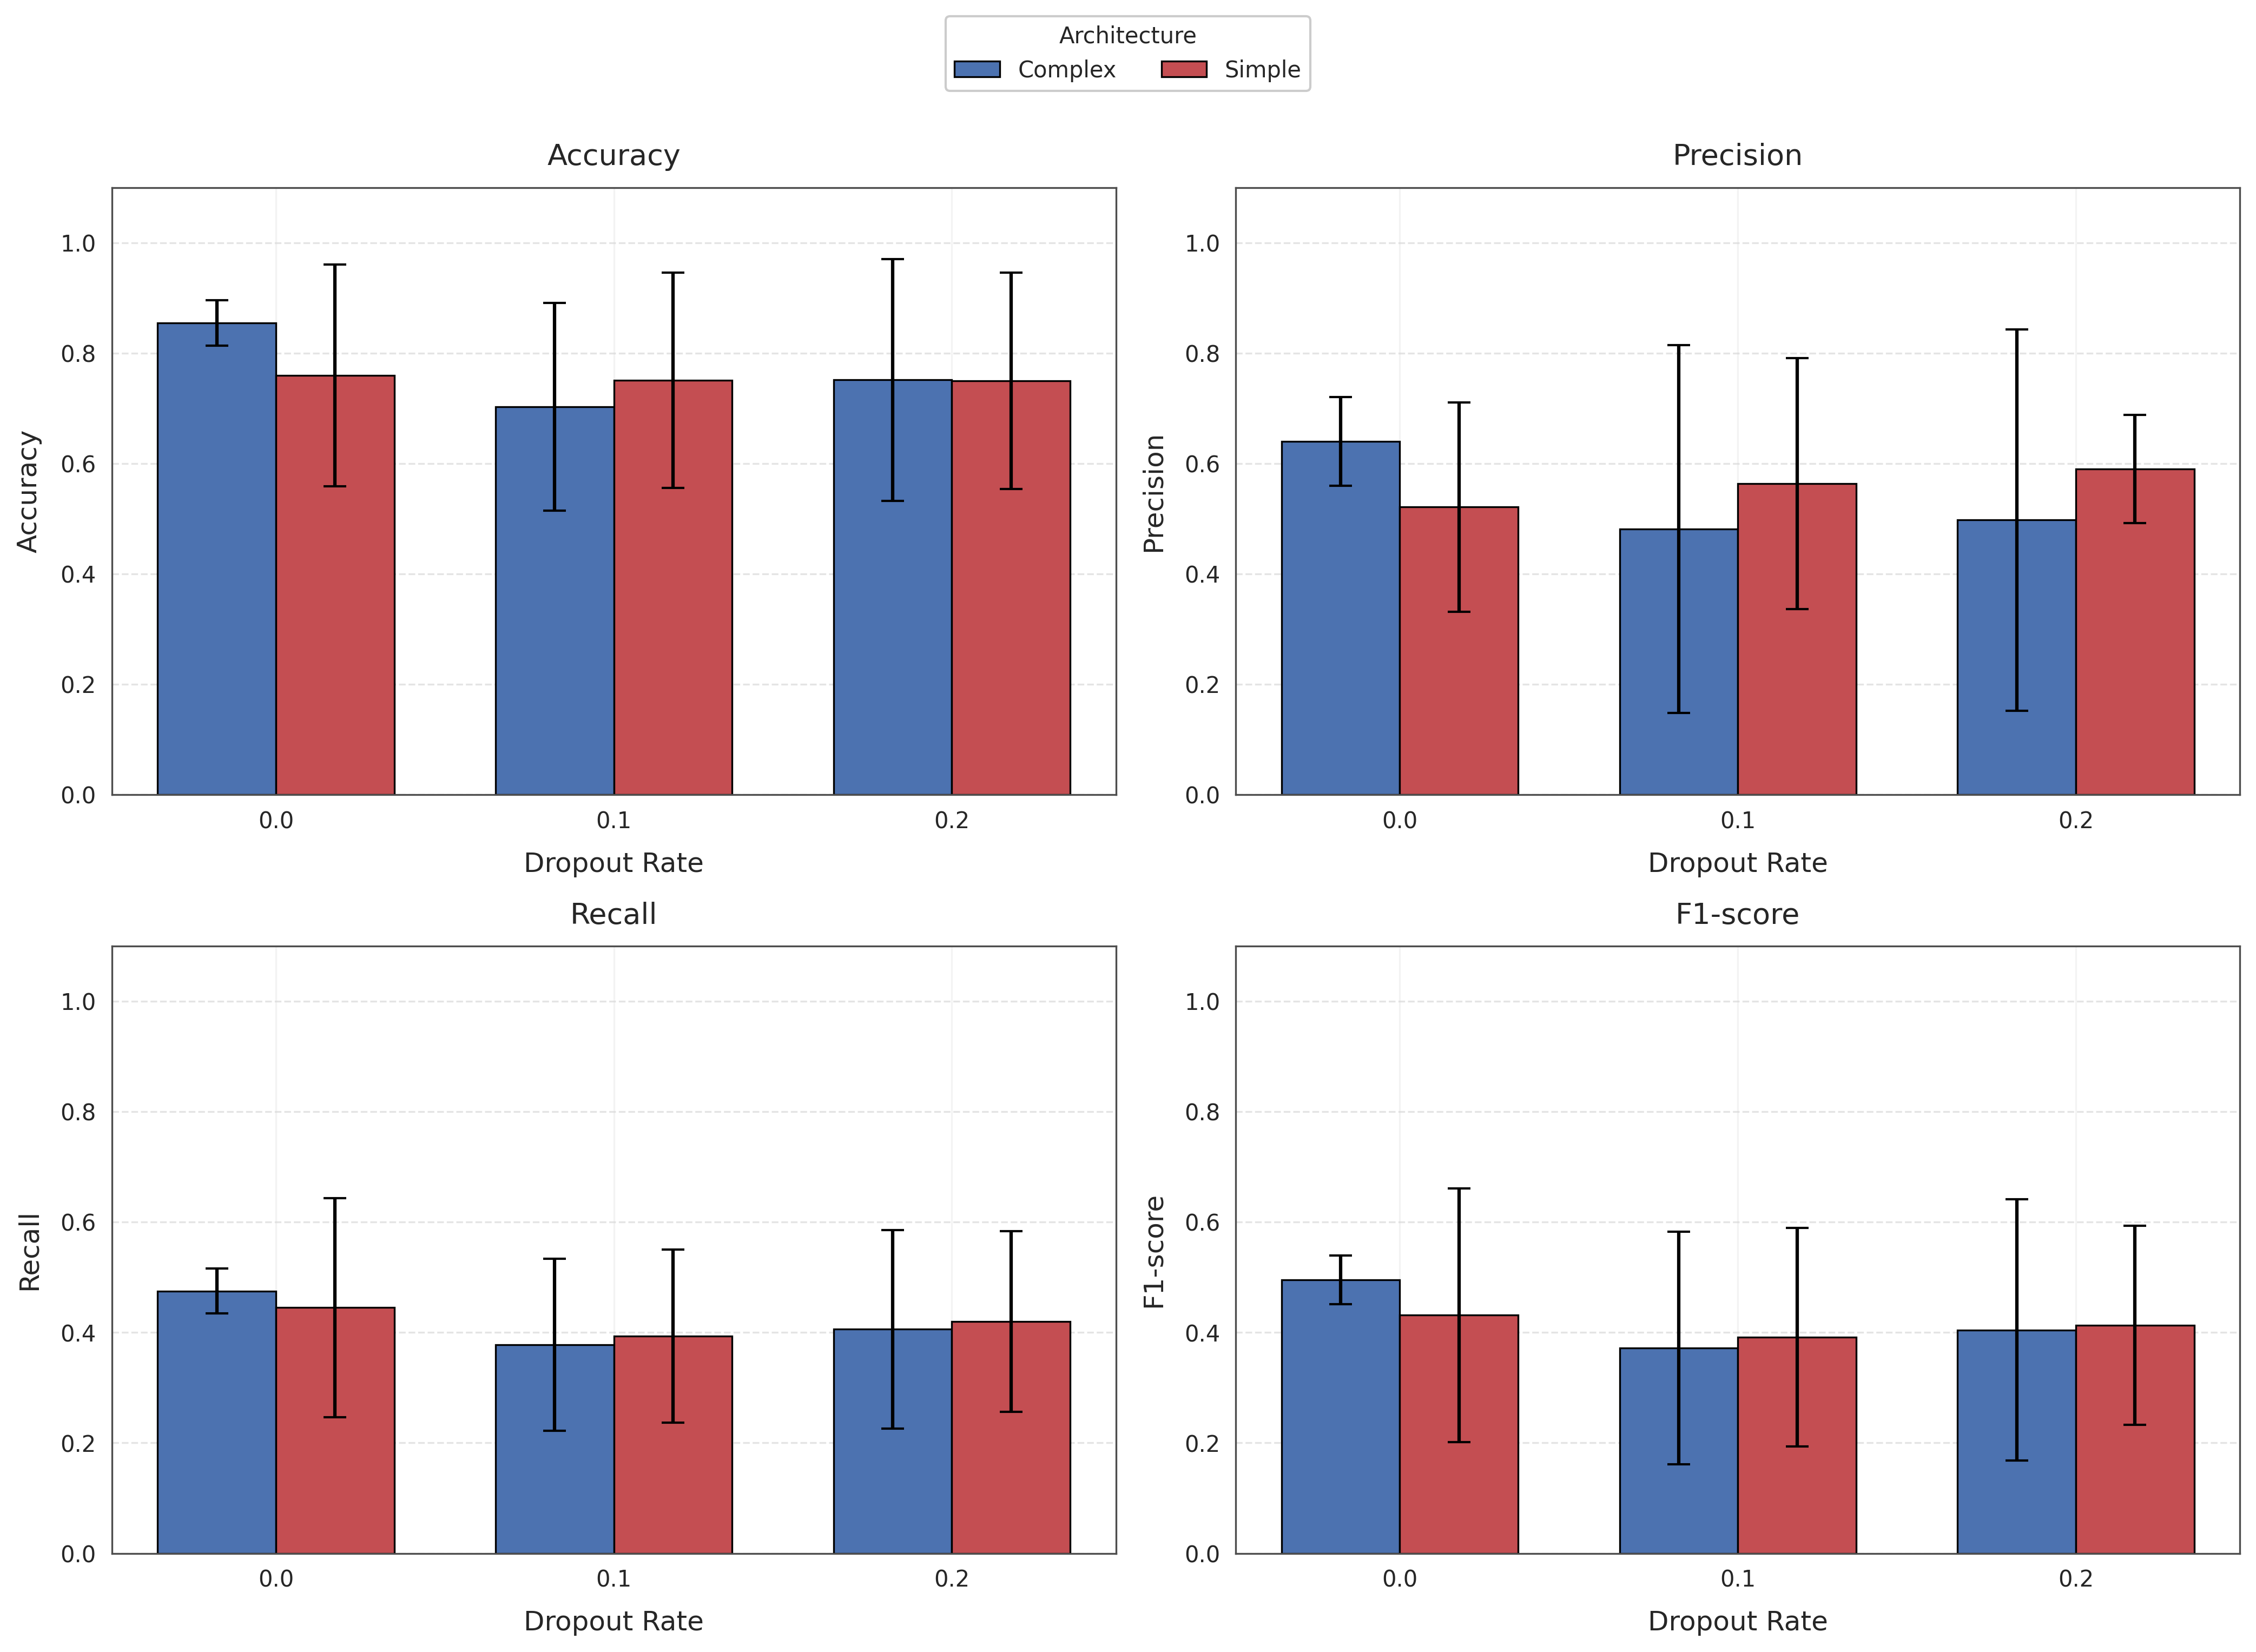

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')

# Set global styles with improved aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'axes.edgecolor': '0.3',
    'grid.color': '0.85'
})

# Load FL-Data-Skew results
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fedavg_global_results_label_skew.csv')

# Ensure dropout is in proper format
df['dropout_rate'] = df['dropout_rate'].round(1)



# Define color scheme
arch_colors = {
    'complex': '#4C72B0',  # Blue
    'simple': '#C44E52'    # Red
}

# Metrics to plot
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Create figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Define bar width and positions
bar_width = 0.35
dropout_rates = sorted(df['dropout_rate'].unique())
x = np.arange(len(dropout_rates))

for i, metric in enumerate(metrics):
    ax = axs[i]

    # Calculate means and stds for each architecture
    complex_data = df[df['architecture'] == 'complex'].groupby('dropout_rate')[metric].agg(['mean', 'std'])
    simple_data = df[df['architecture'] == 'simple'].groupby('dropout_rate')[metric].agg(['mean', 'std'])

    # Plot bars with error caps
    complex_bars = ax.bar(x - bar_width/2, complex_data['mean'],
                         width=bar_width, color=arch_colors['complex'],
                         edgecolor='black', linewidth=0.8,
                         label='Complex', yerr=complex_data['std'],
                         capsize=5, error_kw={'linewidth': 1.5})

    simple_bars = ax.bar(x + bar_width/2, simple_data['mean'],
                        width=bar_width, color=arch_colors['simple'],
                        edgecolor='black', linewidth=0.8,
                        label='Simple', yerr=simple_data['std'],
                        capsize=5, error_kw={'linewidth': 1.5})



    ax.set_title(titles[i], fontsize=13, pad=10)
    ax.set_xlabel('Dropout Rate', labelpad=8)
    ax.set_ylabel(titles[i], labelpad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(dropout_rates)
    ax.set_ylim(0, 1.1)  # Adjust based on your metric range
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add unified legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Architecture',
           loc='upper center', bbox_to_anchor=(0.5, 1.02),
           ncol=2, framealpha=1)

#plt.suptitle('FL-Data-Skew: Performance Metrics vs Dropout Rate',
           #  fontsize=16, y=1.05, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('fl_labelSkew_metrics_bar-finalized.png', dpi=300, bbox_inches='tight')
plt.savefig('fl_labelSkew_metrics_bar-finalized.eps', format='eps', bbox_inches='tight')
plt.show()